In [1]:
import numpy as np
np.__version__

'1.19.5'

In [2]:
import pandas as pd
pd.__version__

'1.1.5'

In [3]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [6]:
import scipy
scipy.__version__

'1.5.4'

In [7]:
from scipy import stats

In [8]:
import seaborn as sns

In [9]:
from datetime import datetime

In [10]:
#from pandarallel import pandarallel

In [11]:
#pandarallel.initialize(progress_bar=True)

In [12]:
default_max_columns=pd.get_option('display.max_columns')

In [13]:
default_max_rows=pd.get_option('display.max_rows')

In [14]:
default_precision=pd.get_option('display.precision')

In [15]:
pd.set_option('display.precision', 2)

In [16]:
default_threshold=np.get_printoptions()['threshold']

In [17]:
np.set_printoptions(threshold=10000000)

# Read meta data

In [18]:
meta = pd.read_csv('20210428-EV/metadata.csv')

In [19]:
meta.head()

,Rand 2 Batch_order,D-plex Sequencing ID,Lexogen Sequencing ID,Diagnosis
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,"
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,"
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,"
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,"


In [20]:
meta.rename(columns={"Rand 2 Batch_order": "subject"},inplace=True)
meta.rename(columns={"D-plex Sequencing ID": "dplex"},inplace=True)
meta.rename(columns={"Lexogen Sequencing ID": "lexogen"},inplace=True)
meta.rename(columns={"Diagnosis": "diag"},inplace=True)
#meta.set_index('subject',inplace=True)

In [21]:
meta

,subject,dplex,lexogen,diag
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,"
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,"
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,"
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,"
5,1_6,SFHH005f,SFHH006f,"Diffuse Astrocytoma, IDH-mutant,"
6,1_7,SFHH005g,SFHH006g,"Oligodendroglioma, IDH-mutant, 1p19q codeleted"
7,1_8,SFHH005h,SFHH006h,"GBM, IDH1R132H WT,"
8,1_9,SFHH005i,SFHH006i,"GBM, IDH-mutant,"
9,1_10,SFHH005j,SFHH006j,"Diffuse Astrocytoma, IDH-mutant,"


In [22]:
meta[['disease','idh','x1p19q']] = meta['diag'].str.split(",", 2, expand=True)
#meta.drop('diag',axis='columns',inplace=True)

In [23]:
meta

,subject,dplex,lexogen,diag,disease,idh,x1p19q
0,1_1,SFHH005a,SFHH006a,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
1,1_2,SFHH005b,SFHH006b,"Oligodendroglioma, IDH-mutant, 1p19q codeleted",Oligodendroglioma,IDH-mutant,1p19q codeleted
2,1_3,SFHH005c,SFHH006c,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,1_4,SFHH005d,SFHH006d,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,1_5,SFHH005e,SFHH006e,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
5,1_6,SFHH005f,SFHH006f,"Diffuse Astrocytoma, IDH-mutant,",Diffuse Astrocytoma,IDH-mutant,
6,1_7,SFHH005g,SFHH006g,"Oligodendroglioma, IDH-mutant, 1p19q codeleted",Oligodendroglioma,IDH-mutant,1p19q codeleted
7,1_8,SFHH005h,SFHH006h,"GBM, IDH1R132H WT,",GBM,IDH1R132H WT,
8,1_9,SFHH005i,SFHH006i,"GBM, IDH-mutant,",GBM,IDH-mutant,
9,1_10,SFHH005j,SFHH006j,"Diffuse Astrocytoma, IDH-mutant,",Diffuse Astrocytoma,IDH-mutant,


# Read raw matrix CORE

In [24]:
#df = pd.read_csv('20210428-EV/dplexonlyreport.csv',index_col=0,header=None)
df = pd.read_csv('20210428-EV/20210513b-report.csv.gz',index_col=0,header=None,low_memory=False)

In [25]:
df.shape

(39, 528)

In [26]:
df.head(12)

,1,2,3,4,5,6,7,8,9,10,...,519,520,521,522,523,524,525,526,527,528
0,,,,,,,,,,,,,,,,,,,,,
,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005ab,SFHH005ab,SFHH005ab,SFHH005ab,...,SFHH006y,SFHH006y,SFHH006y,SFHH006y,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z
---,---,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,---
Subject,3_5,3_5,3_5,3_5,3_5,3_5,3_6,3_6,3_6,3_6,...,3_3,3_3,3_3,3_3,3_4,3_4,3_4,3_4,3_4,3_4
Lab kit,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,...,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen
Trimmer,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,...,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3
Raw Read Count,4038879,4038879,4038879,4038879,4038879,4038879,3088240,3088240,3088240,3088240,...,3665258,3665258,3665258,3665258,4868169,4868169,4868169,4868169,4868169,4868169
Raw Read Length,35.0646,35.0646,35.0646,35.0646,35.0646,35.0646,48.6946,48.6946,48.6946,48.6946,...,34.0495,34.0495,34.0495,34.0495,36.2413,36.2413,36.2413,36.2413,36.2413,36.2413
Trimmed Read Count,1270784,1372973,1372997,1395891,1395893,1395893,1240850,1396651,1396740,1418066,...,3633881,3661993,3664115,3664263,4478092,4823895,4823681,4863961,4867158,4867302
Trimmed Ave Read Length,33.8185,38.2306,38.2314,43.5121,43.5142,43.524,40.8779,51.0991,51.101,64.3485,...,32.6867,33.8972,34.0071,34.0507,30.6793,34.7925,34.7983,36.0631,36.1974,36.242


In [27]:
df.drop("---",inplace=True)

In [28]:
df.shape

(38, 528)

In [29]:
df.rename({'  ':'sample'},axis='rows',inplace=True)
df.rename({'Subject':'subject'},axis='rows',inplace=True)
df.rename({'Trimmer':'trimmer'},axis='rows',inplace=True)

In [30]:
df

,1,2,3,4,5,6,7,8,9,10,...,519,520,521,522,523,524,525,526,527,528
0,,,,,,,,,,,,,,,,,,,,,
sample,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005aa,SFHH005ab,SFHH005ab,SFHH005ab,SFHH005ab,...,SFHH006y,SFHH006y,SFHH006y,SFHH006y,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z,SFHH006z
subject,3_5,3_5,3_5,3_5,3_5,3_5,3_6,3_6,3_6,3_6,...,3_3,3_3,3_3,3_3,3_4,3_4,3_4,3_4,3_4,3_4
Lab kit,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,D-plex,...,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen,Lexogen
trimmer,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,...,bbduk3,cutadapt1,cutadapt2,cutadapt3,bbduk1,bbduk2,bbduk3,cutadapt1,cutadapt2,cutadapt3
Raw Read Count,4038879,4038879,4038879,4038879,4038879,4038879,3088240,3088240,3088240,3088240,...,3665258,3665258,3665258,3665258,4868169,4868169,4868169,4868169,4868169,4868169
Raw Read Length,35.0646,35.0646,35.0646,35.0646,35.0646,35.0646,48.6946,48.6946,48.6946,48.6946,...,34.0495,34.0495,34.0495,34.0495,36.2413,36.2413,36.2413,36.2413,36.2413,36.2413
Trimmed Read Count,1270784,1372973,1372997,1395891,1395893,1395893,1240850,1396651,1396740,1418066,...,3633881,3661993,3664115,3664263,4478092,4823895,4823681,4863961,4867158,4867302
Trimmed Ave Read Length,33.8185,38.2306,38.2314,43.5121,43.5142,43.524,40.8779,51.0991,51.101,64.3485,...,32.6867,33.8972,34.0071,34.0507,30.6793,34.7925,34.7983,36.0631,36.1974,36.242
STAR Aligned to Transcriptome,111104,112499,112492,112689,112696,112689,92673,93752,93727,92285,...,337860,337076,336880,336843,362402,363298,363259,362012,361905,361853


In [31]:
df=df.T
df.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,Bowtie2 Aligned to Salmonella,Bowtie2 Aligned to Salmonella %,Bowtie2 Aligned to masked Salmonella,Bowtie2 Aligned to masked Salmonella %,Bowtie2 Aligned to Burkholderia,Bowtie2 Aligned to Burkholderia %,Bowtie2 Aligned to masked Burkholderia,Bowtie2 Aligned to masked Burkholderia %,Bowtie2 Aligned to mRNA_Prot,Bowtie2 Aligned to mRNA_Prot %
1,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,45946,3.61,14700,1.15,375543,29.55,277406,21.82,58736,4.62
2,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,60133,4.37,17811,1.29,413414,30.11,298416,21.73,71735,5.22
3,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,60133,4.37,17811,1.29,413414,30.11,298416,21.73,71735,5.22
4,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,61284,4.39,18218,1.30,420290,30.10,304330,21.80,75518,5.41
5,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,61285,4.39,18218,1.30,420299,30.10,304339,21.80,75522,5.41


In [32]:
#df=df.merge(meta,left_on='Subject',right_on='subject')
df=df.merge(meta,on='subject')
df.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,Bowtie2 Aligned to masked Burkholderia,Bowtie2 Aligned to masked Burkholderia %,Bowtie2 Aligned to mRNA_Prot,Bowtie2 Aligned to mRNA_Prot %,dplex,lexogen,diag,disease,idh,x1p19q
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,277406,21.82,58736,4.62,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,298416,21.73,71735,5.22,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,298416,21.73,71735,5.22,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,304330,21.80,75518,5.41,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,304339,21.80,75522,5.41,SFHH005aa,SFHH006aa,"GBM, IDH-mutant,",GBM,IDH-mutant,


In [33]:
#element_counts = pd.read_csv('20210428-EV/rmsk_class_counts.csv.gz',index_col=0,low_memory=False)
element_counts = pd.read_csv('20210428-EV/rmsk_family_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210428-EV/rmsk_name_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210428-EV/mirna_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210428-EV/mrna_counts.csv.gz',index_col=0,low_memory=False)
#element_counts = pd.read_csv('20210428-EV/gene_counts.csv.gz',index_col=0,low_memory=False)
# diamond_family_counts
element_counts.head()

,SFHH005aa.bbduk1.bowtie2.rmsk.rmsk_family_counts,SFHH005aa.bbduk2.bowtie2.rmsk.rmsk_family_counts,SFHH005aa.bbduk3.bowtie2.rmsk.rmsk_family_counts,SFHH005aa.cutadapt1.bowtie2.rmsk.rmsk_family_counts,SFHH005aa.cutadapt2.bowtie2.rmsk.rmsk_family_counts,SFHH005aa.cutadapt3.bowtie2.rmsk.rmsk_family_counts,SFHH005ab.bbduk1.bowtie2.rmsk.rmsk_family_counts,SFHH005ab.bbduk2.bowtie2.rmsk.rmsk_family_counts,SFHH005ab.bbduk3.bowtie2.rmsk.rmsk_family_counts,SFHH005a.bbduk1.bowtie2.rmsk.rmsk_family_counts,...,SFHH006y.bbduk3.bowtie2.rmsk.rmsk_family_counts,SFHH006y.cutadapt1.bowtie2.rmsk.rmsk_family_counts,SFHH006y.cutadapt2.bowtie2.rmsk.rmsk_family_counts,SFHH006y.cutadapt3.bowtie2.rmsk.rmsk_family_counts,SFHH006z.bbduk1.bowtie2.rmsk.rmsk_family_counts,SFHH006z.bbduk2.bowtie2.rmsk.rmsk_family_counts,SFHH006z.bbduk3.bowtie2.rmsk.rmsk_family_counts,SFHH006z.cutadapt1.bowtie2.rmsk.rmsk_family_counts,SFHH006z.cutadapt2.bowtie2.rmsk.rmsk_family_counts,SFHH006z.cutadapt3.bowtie2.rmsk.rmsk_family_counts
sequence,,,,,,,,,,,,,,,,,,,,,
5S-Deu-L2,35,36,36,37,37,37,3,5,5,72,...,0,0,0,0,0,0,0,0,0,0
Alu,23819,27898,27899,28766,28766,28766,126234,146087,146098,148305,...,544,576,576,576,957,1426,1426,1554,1554,1555
CR1,354,562,562,614,614,614,1085,1649,1649,2751,...,0,0,0,0,0,1,1,0,0,0
DNA,11,12,12,14,14,14,58,59,59,90,...,0,0,0,0,0,0,0,0,0,0
Dong-R4,0,0,0,0,0,0,0,1,1,31,...,0,0,0,0,0,0,0,0,0,0


In [34]:
element_counts=element_counts.T
element_counts=element_counts.reset_index()
element_counts[['sample','trimmer','other']]=element_counts['index'].str.split(".",2,expand=True)
element_counts.drop(["index","other"],inplace=True,axis='columns')
element_counts.head()

sequence,5S-Deu-L2,Alu,CR1,DNA,Dong-R4,ERV1,ERV1?,ERVK,ERVL,ERVL-MaLR,...,rRNA,scRNA,snRNA,srpRNA,tRNA,tRNA-Deu,tRNA-RTE,telo,sample,trimmer
0,35,23819,354,11,0,3560,2,446,2858,4978,...,1735,87,1,13,79,9,4,37,SFHH005aa,bbduk1
1,36,27898,562,12,0,4479,40,559,3603,6530,...,2004,88,3,14,95,10,6,38,SFHH005aa,bbduk2
2,36,27899,562,12,0,4479,40,559,3603,6530,...,2004,88,3,14,95,10,6,38,SFHH005aa,bbduk3
3,37,28766,614,14,0,4616,43,567,3727,6904,...,2017,89,3,16,106,12,6,40,SFHH005aa,cutadapt1
4,37,28766,614,14,0,4616,43,567,3727,6904,...,2017,89,3,16,106,12,6,40,SFHH005aa,cutadapt2


In [35]:
df=df.merge(element_counts,on=['sample','trimmer'])
df.shape

(528, 100)

In [36]:
df.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,hAT-Tip100?,hAT?,rRNA,scRNA,snRNA,srpRNA,tRNA,tRNA-Deu,tRNA-RTE,telo
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,38,1,1735,87,1,13,79,9,4,37
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,40,2,2004,88,3,14,95,10,6,38
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,40,2,2004,88,3,14,95,10,6,38
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,40,2,2017,89,3,16,106,12,6,40
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,40,2,2017,89,3,16,106,12,6,40


In [37]:
df.columns  #.tolist()

Index(['sample', 'subject', 'Lab kit', 'trimmer', 'Raw Read Count',
       'Raw Read Length', 'Trimmed Read Count', 'Trimmed Ave Read Length',
       'STAR Aligned to Transcriptome', 'STAR Aligned to Transcriptome %',
       'STAR Aligned to Genome', 'STAR Aligned to Genome %', 'STAR Unaligned',
       'STAR Unaligned %', 'STAR Unmapped', 'STAR Unmapped %',
       'Bowtie2 Aligned to hg38 (1)', 'Bowtie2 Aligned to hg38 (1) %',
       'STAR Aligned to mirna', 'STAR Aligned to mirna %',
       'Bowtie Aligned to mirna', 'Bowtie Aligned to mirna %',
       'Bowtie2 Aligned to mirna', 'Bowtie2 Aligned to mirna %',
       'Bowtie2 Aligned to RMSK', 'Bowtie2 Aligned to RMSK %',
       'Bowtie2 Aligned to phiX', 'Bowtie2 Aligned to phiX %',
       'Bowtie2 Aligned to Salmonella', 'Bowtie2 Aligned to Salmonella %',
       'Bowtie2 Aligned to masked Salmonella',
       'Bowtie2 Aligned to masked Salmonella %',
       'Bowtie2 Aligned to Burkholderia', 'Bowtie2 Aligned to Burkholderia %',
      

In [38]:
#genes=df.columns[92:142]
#genes=df.columns[100:554]
#a=df.columns.tolist().index('STAR Gene Counts')+1
#b=df.columns.tolist().index('STAR miRNA Counts')
#genes=df.columns[a:b]
elements=element_counts.columns[:-2]
elements

Index(['5S-Deu-L2', 'Alu', 'CR1', 'DNA', 'Dong-R4', 'ERV1', 'ERV1?', 'ERVK',
       'ERVL', 'ERVL-MaLR', 'ERVL?', 'Gypsy', 'Gypsy?', 'Helitron', 'L1', 'L2',
       'LTR', 'Low_complexity', 'MIR', 'MULE-MuDR', 'Merlin', 'PIF-Harbinger',
       'Penelope', 'PiggyBac', 'PiggyBac?', 'RNA', 'RTE-BovB', 'RTE-X', 'SVA',
       'Satellite', 'Simple_repeat', 'TcMar', 'TcMar-Mariner', 'TcMar-Pogo',
       'TcMar-Tc2', 'TcMar-Tigger', 'TcMar?', 'Unknown', 'acro', 'centr',
       'hAT', 'hAT-Ac', 'hAT-Blackjack', 'hAT-Charlie', 'hAT-Tag1',
       'hAT-Tip100', 'hAT-Tip100?', 'hAT?', 'rRNA', 'scRNA', 'snRNA', 'srpRNA',
       'tRNA', 'tRNA-Deu', 'tRNA-RTE', 'telo'],
      dtype='object', name='sequence')

In [39]:
df['Raw Read Count'] = pd.to_numeric(df['Raw Read Count'], errors='coerce')

In [40]:
df['Trimmed Read Count'] = pd.to_numeric(df['Trimmed Read Count'], errors='coerce')

In [41]:
pd.set_option('display.max_rows',None)

In [42]:
#df[['subject','sample','Raw Read Count']].drop_duplicates().sort_values(by='Raw Read Count')

In [43]:
#df[['subject','sample','trimmer','Trimmed Read Count']].drop_duplicates().sort_values(by='Trimmed Read Count')

In [44]:
pd.set_option('display.max_rows',default_max_rows)

# Prepping to ttest all items against all other items

In [45]:
df['diag'].unique()

array(['GBM, IDH-mutant,', 'Diffuse Astrocytoma, IDH-mutant,',
       'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
       'V01 control (S1),,', 'GBM, IDH1R132H WT,', 'blank 2 (C1),,',
       'blank1 (C1),,'], dtype=object)

In [46]:
u=df['diag'].unique()
diags=u[0:3]
diags=np.append(diags,u[4])

In [47]:
diags

array(['GBM, IDH-mutant,', 'Diffuse Astrocytoma, IDH-mutant,',
       'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
       'GBM, IDH1R132H WT,'], dtype=object)

In [48]:
type(diags)

numpy.ndarray

In [49]:
diags=diags.tolist()

In [50]:
diags

['GBM, IDH-mutant,',
 'Diffuse Astrocytoma, IDH-mutant,',
 'Oligodendroglioma, IDH-mutant, 1p19q codeleted',
 'GBM, IDH1R132H WT,']

In [51]:
# Why was this here?

#import warnings
#warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

pca plots

In [52]:
def ttests_boxplots_and_heatmaps(localdf,columns,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    for col in columns:

        if ( col not in localdf.columns ):
            continue

        for labkit in localdf['Lab kit'].unique():
            #"D-plex","Lexogen":
            for trimmer in 'bbduk2','cutadapt2':
                #localdf['Trimmer'].unique():
                #"bbduk1","bbduk2","bbduk3","cutadapt1","cutadapt2","cutadapt3":
                for diag in diags:
                    others=diags.copy()
                    others.remove(diag)
                    for other in others:
                        t, p = stats.ttest_ind(
                            localdf[((localdf["Lab kit"]==labkit) &
                                     (localdf["trimmer"]==trimmer) & 
                                (localdf["diag"]==diag))][col],
                            localdf[((localdf["Lab kit"]==labkit) &
                                     (localdf["trimmer"]==trimmer) & 
                                (localdf["diag"]==other))][col])
                        if p < heat_p:
                            select_p_values.append([abs(t),p,col,labkit,trimmer])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col','labkit','trimmer'])                        
    pdf=pdf.drop_duplicates().sort_values('p')

    for index, row in pdf.iterrows():
        if row['p'] < box_p:
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+
                  row['labkit']+"  :  "+row['trimmer']+"  :  "+row['col'])
            print("Control and blanks")
            print(localdf[
                (localdf['diag']=='V01 control (S1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
            print(localdf[
                (localdf['diag']=='blank 2 (C1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
            print(localdf[
                (localdf['diag']=='blank1 (C1),,') &
                (localdf["Lab kit"]==row['labkit']) &
                (localdf["trimmer"]==row['trimmer'])][row['col']])
                        
            localdf[((localdf["Lab kit"]==row['labkit']) &
                     (localdf["trimmer"]==row['trimmer']))].boxplot(
                column=row['col'],by=['diag'])
            plt.title(row['col'] + " Normalized by Trimmed Read Count")
            plt.xticks(rotation=75,ha='right')
            plt.show()

    selected=['subject','sample','Lab kit','trimmer','diag','idh']
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)

    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    if len(selected) > 7:
        for trimmer in 'bbduk2','cutadapt2':
            for labkit in dfn['Lab kit'].unique():
                tmp=localdf[selected].copy()
                tmp=tmp[(tmp['trimmer']==trimmer) & (tmp['Lab kit']==labkit)]
                tmp=tmp.drop('trimmer',axis='columns')
                tmp=tmp.drop('Lab kit',axis='columns')
                tmp.set_index(['subject','sample','diag','idh'],inplace=True)
                
                #tmp-=tmp.min() # This may almost always be 0 now.
                tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
                # ...
                #standard_scale int or None, optional
                #Either 0 (rows) or 1 (columns).
                #Whether or not to standardize that dimension, meaning for each row or column,
                #subtract the minimum and divide each by its maximum.
                # how would that deal with 0s or empty cells

                tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this
                
                tmp.reset_index(inplace=True)

                #tmp1=tmp.sort_values(['diag']).T
                tmp=tmp.sort_values(['idh','diag'])
                #print(tmp.head())
                tmp.drop(['subject'],inplace=True,axis='columns')
                tmp.set_index(['sample','idh'],inplace=True)
                
                diagnoses=tmp.pop('diag')
                #lut = dict(zip(diagnoses.unique(), "rgbcmykb"))
                #col_colors = diagnoses.map(lut)
                #print(col_colors)
                #print(tmp.columns)
                
                tmp=tmp.T

                #print('pal')
                network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
                #print(network_pal)
                network_pal
                #print('lut')
                network_lut = dict(zip(diagnoses.unique(), network_pal))
                #print(network_lut)
                #print('labels')
                # Convert the palette to vectors that will be drawn on the side of the matrix
                network_labels = diagnoses
                #print(network_labels)
                network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
                #print('colors')
                #print(network_colors)
                
                # from http://dawnmy.github.io/2016/10/24/Plot-heatmaap-with-side-color-indicating-the-class-of-variables/
                # Create a custom palette to identify the networks
                #network_pal = sns.cubehelix_palette(len(used_networks),
                #                    light=.9, dark=.1, reverse=True,
                #                    start=1, rot=-2)
                #network_lut = dict(zip(map(str, used_networks), network_pal))

                # Convert the palette to vectors that will be drawn on the side of the matrix
                #network_labels = df.columns.get_level_values("network")
                #network_colors = pd.Series(network_labels, index=df.columns).map(network_lut)                
   
                # Create a custom colormap for the heatmap values
                #cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

                # Draw the full plot
                #g = sns.clustermap(df.corr(),

                #                 # Turn off the clustering
                #                 row_cluster=False, col_cluster=False,

                #                  # Add colored class labels
                #                  row_colors=network_colors, col_colors=network_colors,

                #                  # Make the plot look better when many rows/cols
                #                  linewidths=0, xticklabels=False, yticklabels=False)

                # Draw the legend bar for the classes                 
                #for label in network_labels.unique():
                #    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                #                            label=label, linewidth=0)
                #g.ax_col_dendrogram.legend(loc="center", ncol=5)

                
                g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",col_colors=network_colors)
                g.fig.suptitle("Clustermap 1 : "+trimmer+" "+labkit)
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

                # Draw the legend bar for the classes                 
                for label in network_labels.unique():
                    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                            label=label, linewidth=0)
                g.ax_col_dendrogram.legend(loc="center", ncol=4)
                
                # Adjust the postion of the main colorbar for the heatmap
                #g.cax.set_position([.97, .2, .03, .45])
                g.cax.set_position([0, .15, .005, .65])
                plt.show()

                g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",col_colors=network_colors)
                g.fig.suptitle("Clustermap 2 : "+trimmer+" "+labkit)
                plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

                # Draw the legend bar for the classes                 
                for label in network_labels.unique():
                    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                            label=label, linewidth=0)
                g.ax_col_dendrogram.legend(loc="center", ncol=4)
                                
                # Adjust the postion of the main colorbar for the heatmap
                # [dist from left,dist from bottom?,width?,height?]
                g.cax.set_position([0, .15, .005, .65])
                plt.show()  
    else:
        print("Not enough data to produce cluster maps")

# Normalize by Trimmed Read Count

In [53]:
dfn=df.copy()

In [54]:
dfn.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,hAT-Tip100?,hAT?,rRNA,scRNA,snRNA,srpRNA,tRNA,tRNA-Deu,tRNA-RTE,telo
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,38,1,1735,87,1,13,79,9,4,37
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,40,2,2004,88,3,14,95,10,6,38
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,40,2,2004,88,3,14,95,10,6,38
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,40,2,2017,89,3,16,106,12,6,40
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,40,2,2017,89,3,16,106,12,6,40


In [55]:
datetime.now().strftime("%H:%M:%S")

'10:53:04'

In [56]:
dfn[elements]=(1e9*dfn[elements].values)/dfn[['Trimmed Read Count']].values

In [57]:
datetime.now().strftime("%H:%M:%S")

'10:53:04'

In [58]:
dfn.head()

,sample,subject,Lab kit,trimmer,Raw Read Count,Raw Read Length,Trimmed Read Count,Trimmed Ave Read Length,STAR Aligned to Transcriptome,STAR Aligned to Transcriptome %,...,hAT-Tip100?,hAT?,rRNA,scRNA,snRNA,srpRNA,tRNA,tRNA-Deu,tRNA-RTE,telo
0,SFHH005aa,3_5,D-plex,bbduk1,4038879,35.0646,1270784,33.8185,111104,8.74,...,29902.80,786.92,1.37e+06,68461.67,786.92,10229.91,62166.35,7082.24,3147.66,29115.88
1,SFHH005aa,3_5,D-plex,bbduk2,4038879,35.0646,1372973,38.2306,112499,8.19,...,29133.86,1456.69,1.46e+06,64094.49,2185.04,10196.85,69192.91,7283.46,4370.08,27677.16
2,SFHH005aa,3_5,D-plex,bbduk3,4038879,35.0646,1372997,38.2314,112492,8.19,...,29133.35,1456.67,1.46e+06,64093.37,2185.00,10196.67,69191.70,7283.34,4370.00,27676.68
3,SFHH005aa,3_5,D-plex,cutadapt1,4038879,35.0646,1395891,43.5121,112689,8.07,...,28655.53,1432.78,1.44e+06,63758.56,2149.16,11462.21,75937.16,8596.66,4298.33,28655.53
4,SFHH005aa,3_5,D-plex,cutadapt2,4038879,35.0646,1395893,43.5142,112696,8.07,...,28655.49,1432.77,1.44e+06,63758.47,2149.16,11462.20,75937.05,8596.65,4298.32,28655.49


In [59]:
datetime.now().strftime("%H:%M:%S")

'10:53:04'

In [60]:
for c in ['CDKN2A','CDKN2A-DT','CDKN2AIP','CDKN2AIPNL','CDKN2B','CDKN2B-AS1',
    'EGFR','EGFR-AS1','IDH1','IDH1-AS1','IDH2','IDH2-DT','NF1','NOTCH1',
    'RB1','RB1CC1','RB1-DT','TERT','TP53']:
        if( c not in dfn.columns ):
            print("Missing "+c) 

Missing CDKN2A
Missing CDKN2A-DT
Missing CDKN2AIP
Missing CDKN2AIPNL
Missing CDKN2B
Missing CDKN2B-AS1
Missing EGFR
Missing EGFR-AS1
Missing IDH1
Missing IDH1-AS1
Missing IDH2
Missing IDH2-DT
Missing NF1
Missing NOTCH1
Missing RB1
Missing RB1CC1
Missing RB1-DT
Missing TERT
Missing TP53


In [61]:
datetime.now().strftime("%H:%M:%S")

'10:53:04'

# Select Genes (if using Genes)

In [62]:
ttests_boxplots_and_heatmaps(dfn,['CDKN2A','CDKN2A-DT','CDKN2AIP','CDKN2AIPNL','CDKN2B','CDKN2B-AS1','EGFR',
                                  'EGFR-AS1','IDH1','IDH1-AS1','IDH2','IDH2-DT','NF1','NOTCH1','RB1','RB1CC1',
                                  'RB1-DT','TERT','TP53'],box_p=0.1,heat_p=0.2)

Not enough data to produce cluster maps


In [63]:
datetime.now().strftime("%H:%M:%S")

'10:53:04'

# Elements

 p : 0.02049754350214948  ( t : 2.54062207652321 ) :  D-plex  :  bbduk2  :  hAT-Tip100?
Control and blanks
73       773.01
337    11572.04
Name: hAT-Tip100?, dtype: float64
205    19341.82
Name: hAT-Tip100?, dtype: float64
469    18928.87
Name: hAT-Tip100?, dtype: float64


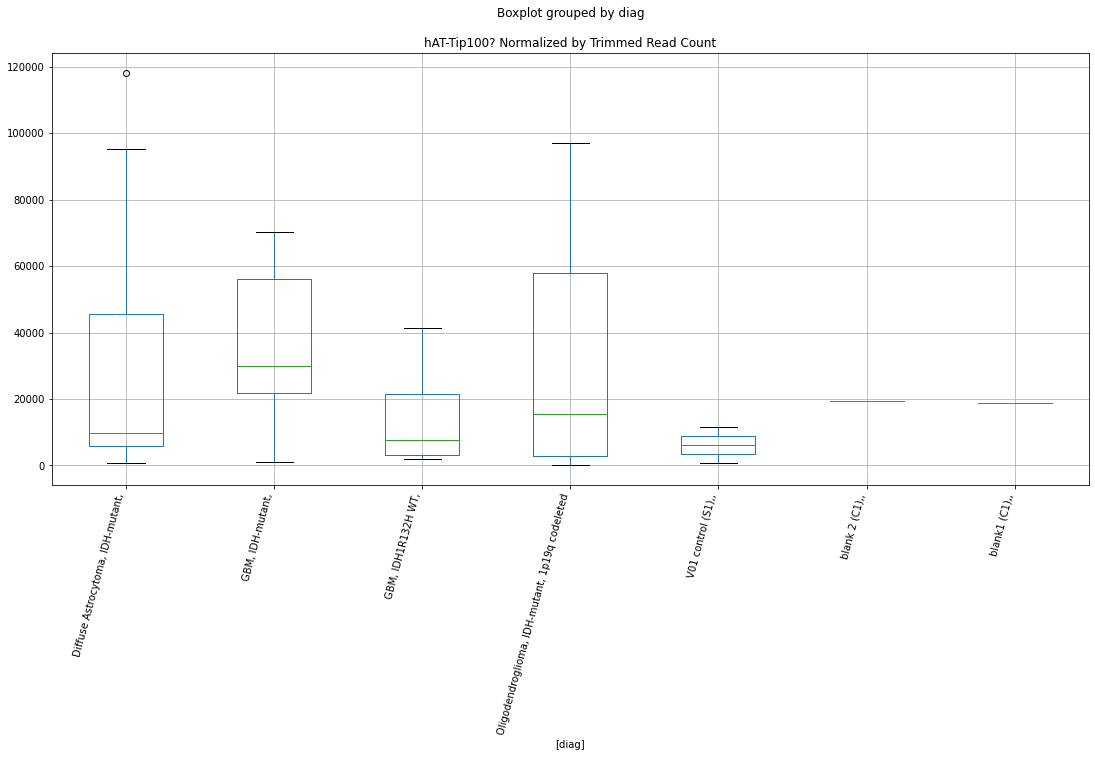

 p : 0.021490515847808818  ( t : 2.51794193892143 ) :  D-plex  :  cutadapt2  :  tRNA-Deu
Control and blanks
76     2272.84
340       0.00
Name: tRNA-Deu, dtype: float64
208    5114.45
Name: tRNA-Deu, dtype: float64
472    2889.78
Name: tRNA-Deu, dtype: float64


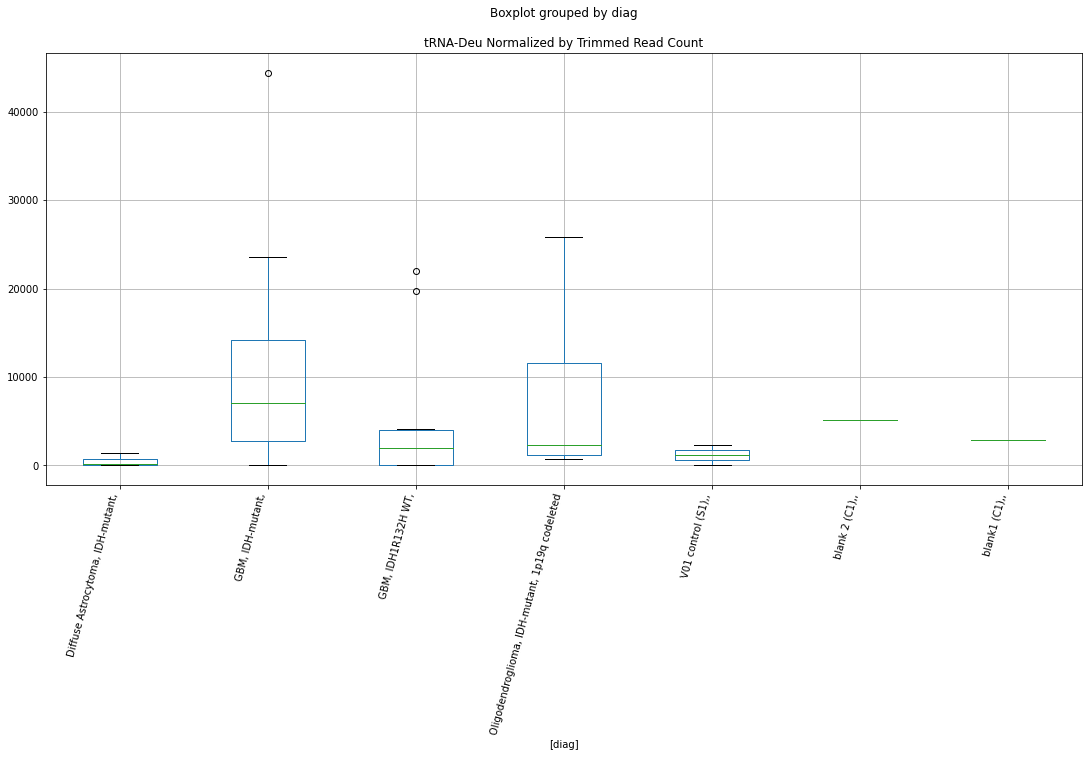

 p : 0.02222096689764096  ( t : 2.501880817786632 ) :  D-plex  :  cutadapt2  :  Gypsy?
Control and blanks
76     36365.48
340    81027.36
Name: Gypsy?, dtype: float64
208    101936.21
Name: Gypsy?, dtype: float64
472    85537.46
Name: Gypsy?, dtype: float64


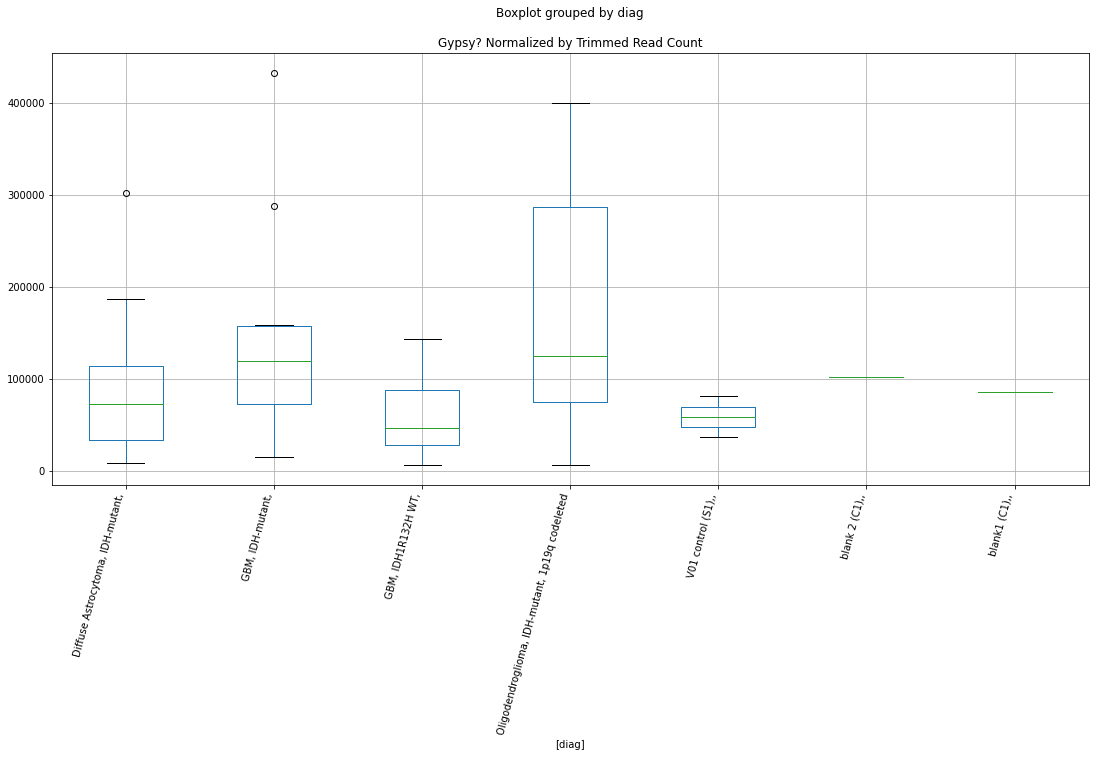

 p : 0.026383091839405435  ( t : 2.418880056476253 ) :  D-plex  :  bbduk2  :  Gypsy?
Control and blanks
73     32466.35
337    81894.47
Name: Gypsy?, dtype: float64
205    89903.66
Name: Gypsy?, dtype: float64
469    73349.39
Name: Gypsy?, dtype: float64


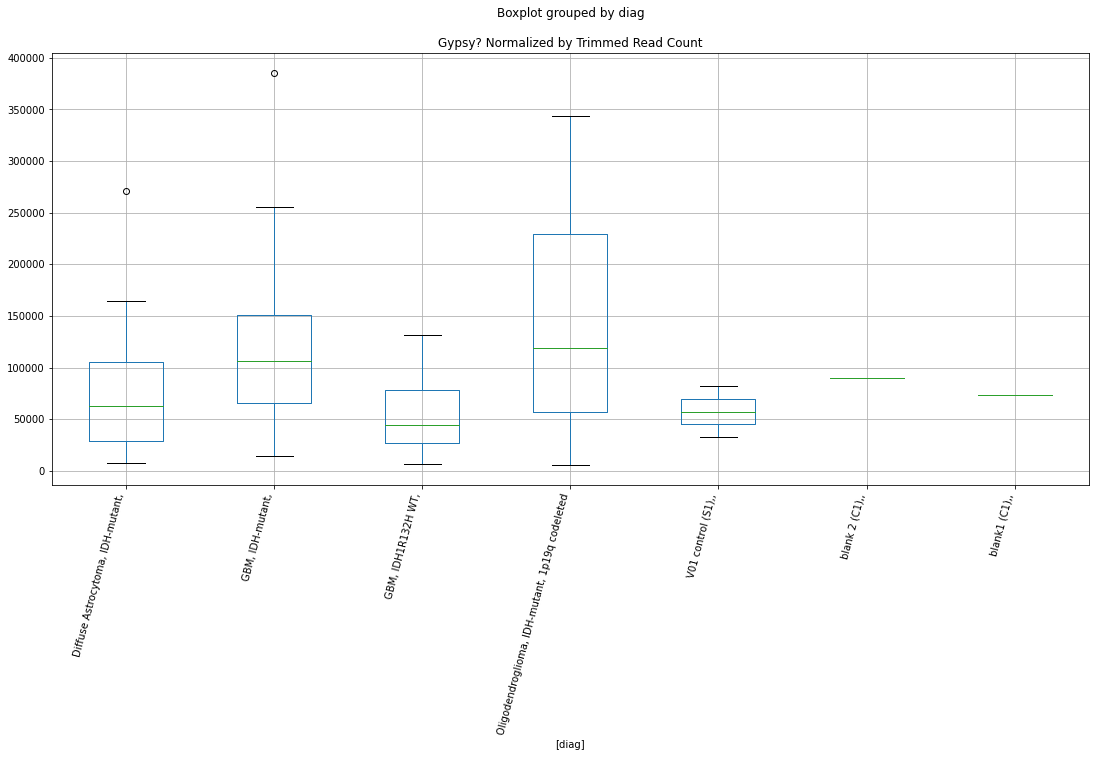

 p : 0.026652816828107925  ( t : 2.4139351236547233 ) :  D-plex  :  cutadapt2  :  Simple_repeat
Control and blanks
76     9.18e+06
340    8.91e+06
Name: Simple_repeat, dtype: float64
208    6.74e+06
Name: Simple_repeat, dtype: float64
472    8.54e+06
Name: Simple_repeat, dtype: float64


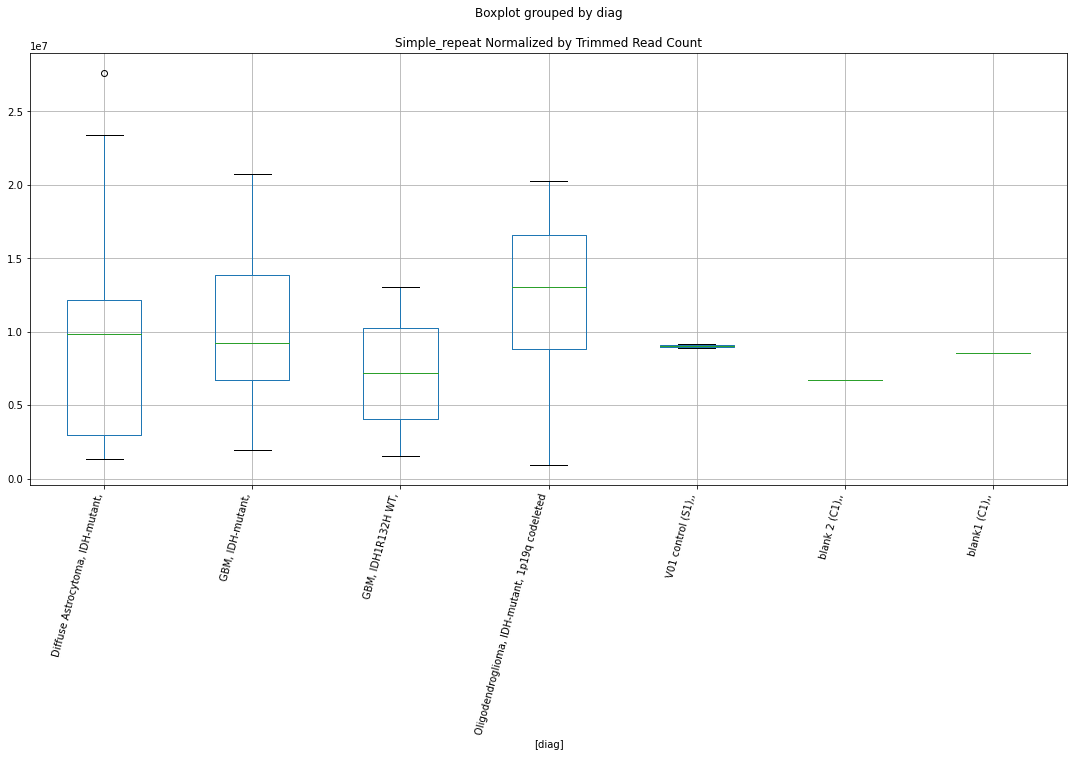

 p : 0.027829289883417072  ( t : 2.392899938531092 ) :  D-plex  :  cutadapt2  :  tRNA-Deu
Control and blanks
76     2272.84
340       0.00
Name: tRNA-Deu, dtype: float64
208    5114.45
Name: tRNA-Deu, dtype: float64
472    2889.78
Name: tRNA-Deu, dtype: float64


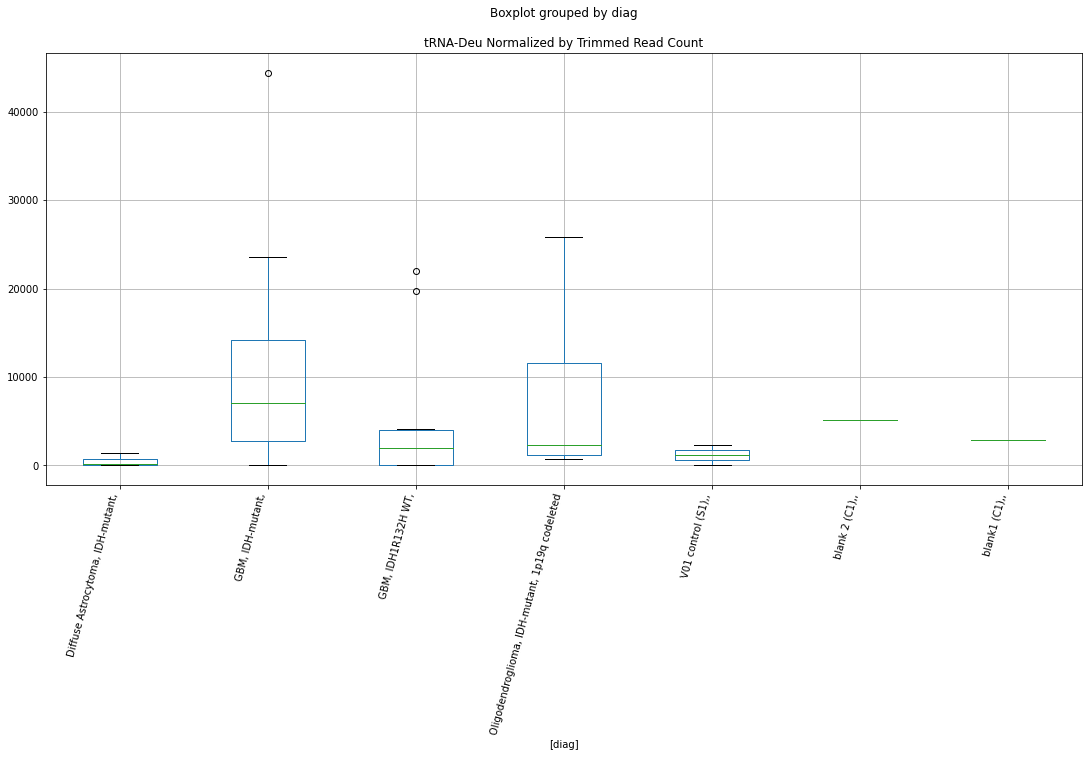

 p : 0.029018055645442513  ( t : 2.3724727313320644 ) :  D-plex  :  bbduk2  :  tRNA-Deu
Control and blanks
73     2319.03
337       0.00
Name: tRNA-Deu, dtype: float64
205    4119.09
Name: tRNA-Deu, dtype: float64
469    2957.64
Name: tRNA-Deu, dtype: float64


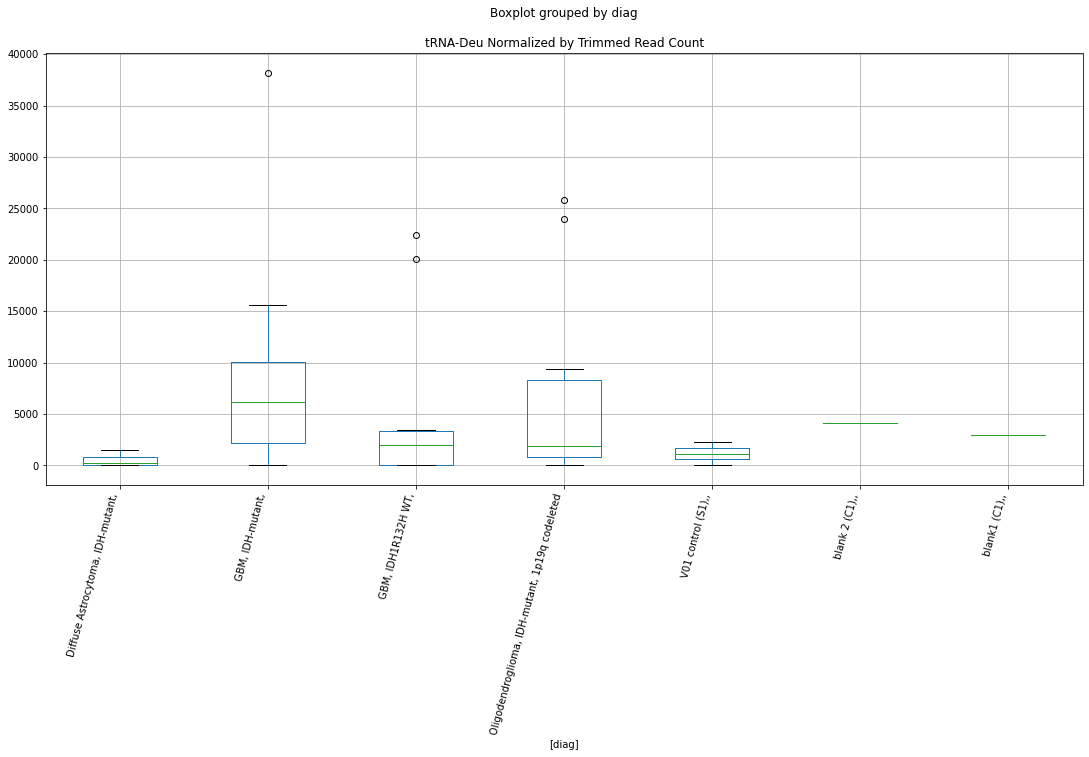

 p : 0.030420947937088473  ( t : 2.349347224720492 ) :  D-plex  :  bbduk2  :  Simple_repeat
Control and blanks
73     7.33e+06
337    8.14e+06
Name: Simple_repeat, dtype: float64
205    5.89e+06
Name: Simple_repeat, dtype: float64
469    6.14e+06
Name: Simple_repeat, dtype: float64


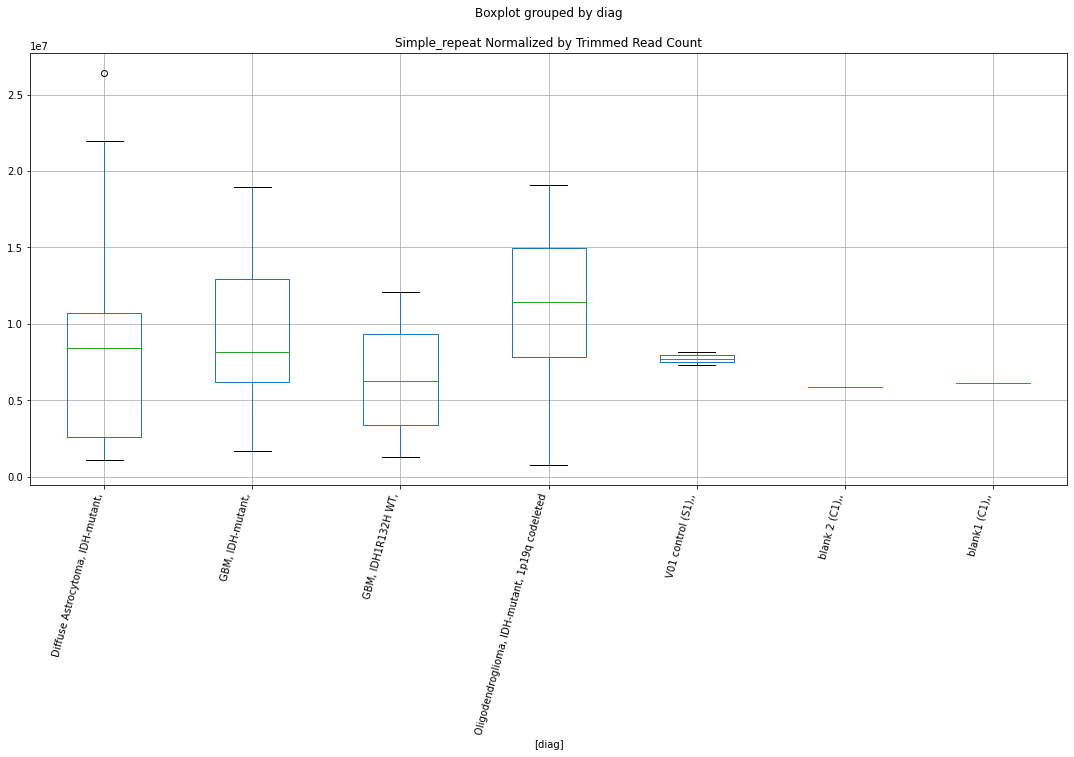

 p : 0.03242114361302736  ( t : 2.318036676866181 ) :  D-plex  :  bbduk2  :  DNA
Control and blanks
73     5411.06
337    1780.31
Name: DNA, dtype: float64
205    17371.82
Name: DNA, dtype: float64
469    15971.24
Name: DNA, dtype: float64


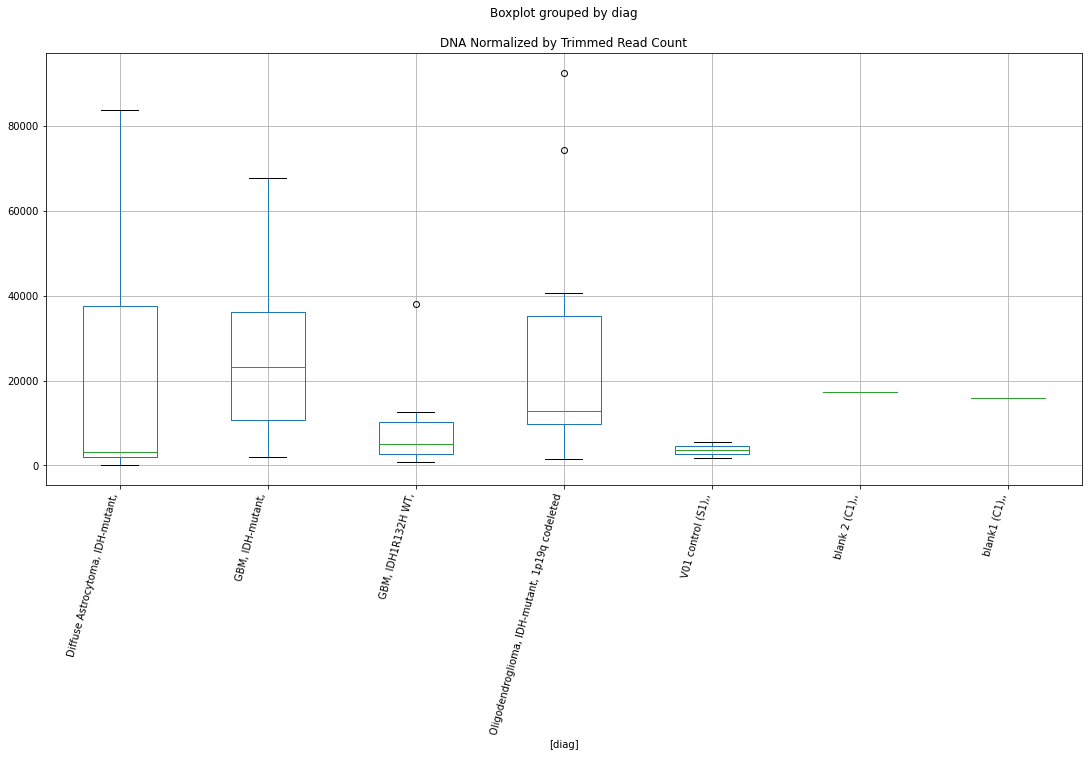

 p : 0.03269789155457086  ( t : 2.313846729258186 ) :  D-plex  :  cutadapt2  :  MULE-MuDR
Control and blanks
76      2272.84
340    78385.16
Name: MULE-MuDR, dtype: float64
208    44090.05
Name: MULE-MuDR, dtype: float64
472    48548.29
Name: MULE-MuDR, dtype: float64


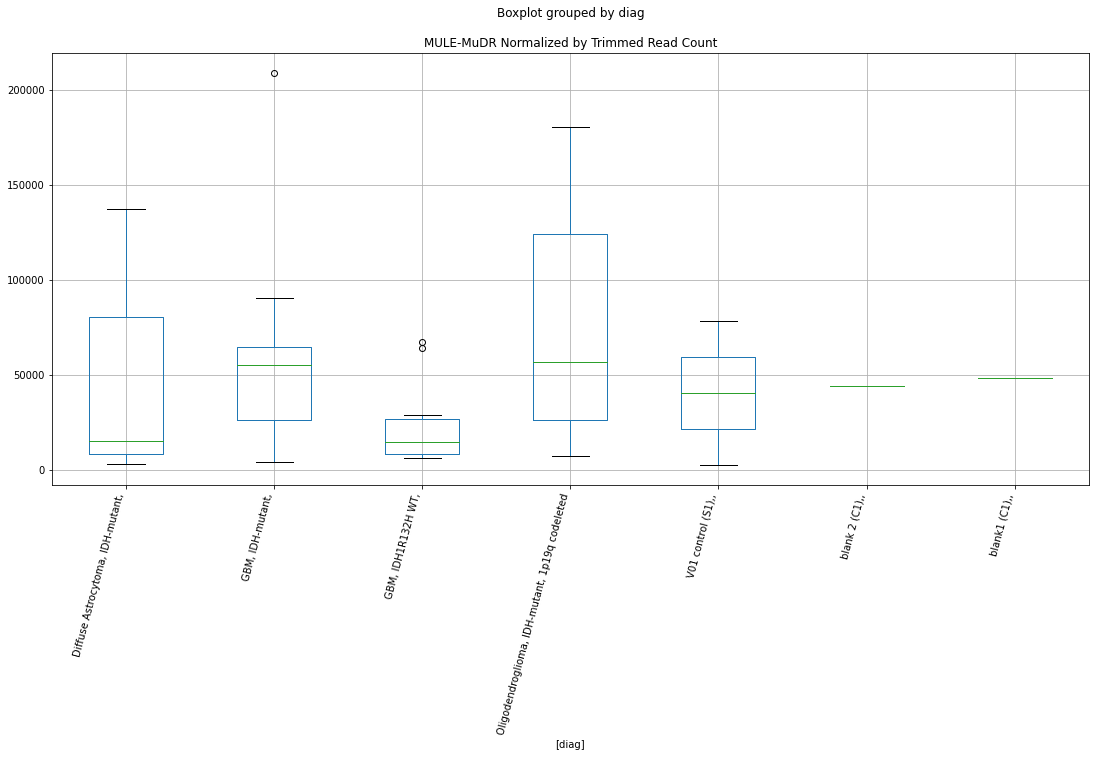

 p : 0.03366019946540956  ( t : 2.2995292385608423 ) :  D-plex  :  bbduk2  :  rRNA
Control and blanks
73     2.26e+06
337    2.44e+06
Name: rRNA, dtype: float64
205    1.35e+06
Name: rRNA, dtype: float64
469    1.45e+06
Name: rRNA, dtype: float64


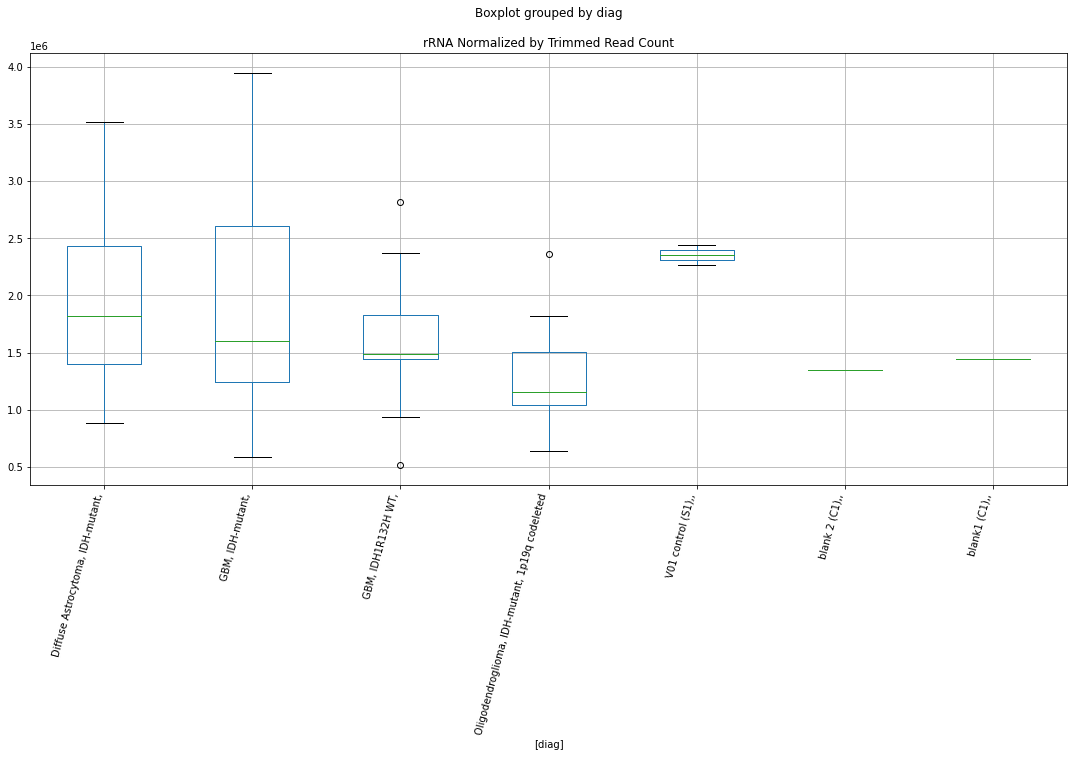

 p : 0.034984299036124  ( t : 2.2804369646984615 ) :  D-plex  :  cutadapt2  :  rRNA
Control and blanks
76     2.24e+06
340    2.45e+06
Name: rRNA, dtype: float64
208    1.35e+06
Name: rRNA, dtype: float64
472    1.44e+06
Name: rRNA, dtype: float64


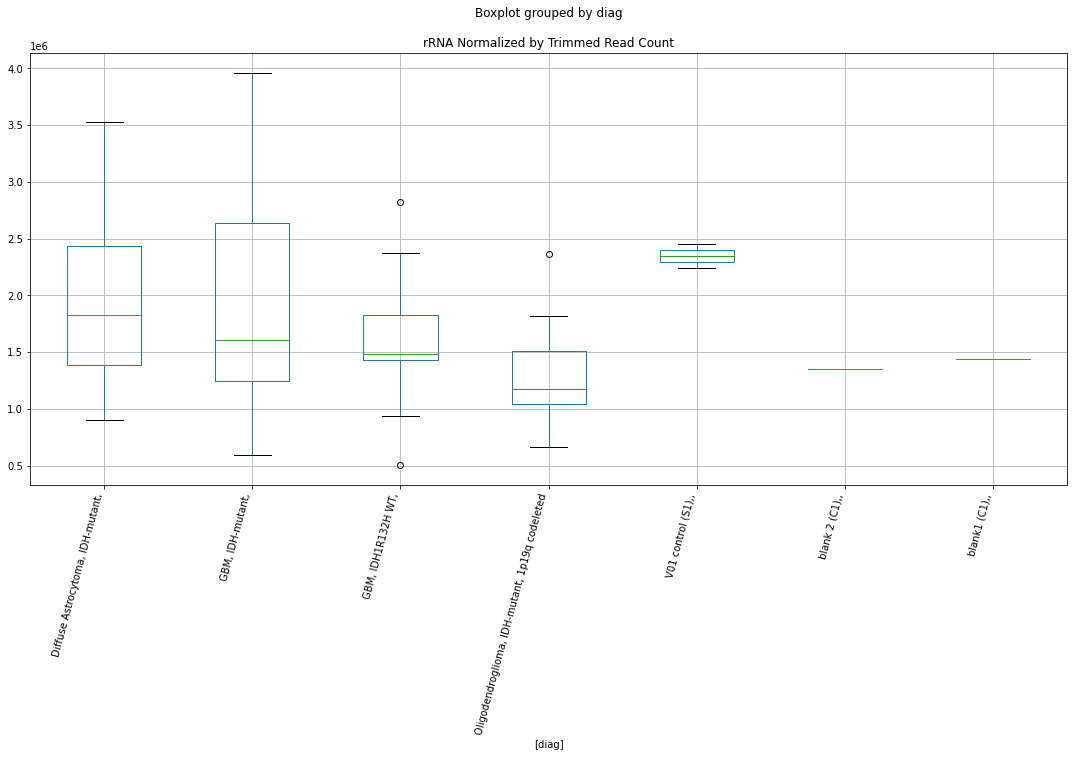

 p : 0.036186222337553274  ( t : 2.263676846377295 ) :  D-plex  :  cutadapt2  :  PiggyBac
Control and blanks
76      5303.30
340    37871.48
Name: PiggyBac, dtype: float64
208    25395.87
Name: PiggyBac, dtype: float64
472    27741.88
Name: PiggyBac, dtype: float64


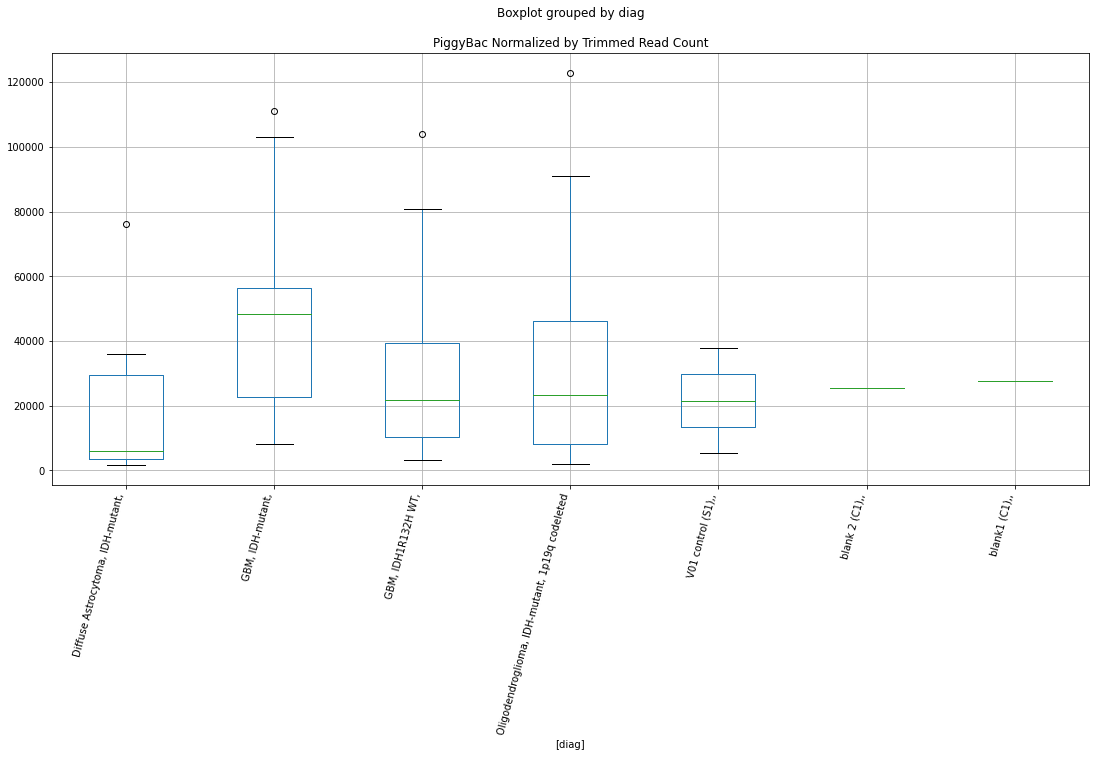

 p : 0.03635008305286014  ( t : 2.261431891631252 ) :  D-plex  :  bbduk2  :  MULE-MuDR
Control and blanks
73      2319.03
337    78333.84
Name: MULE-MuDR, dtype: float64
205    43519.1
Name: MULE-MuDR, dtype: float64
469    50279.82
Name: MULE-MuDR, dtype: float64


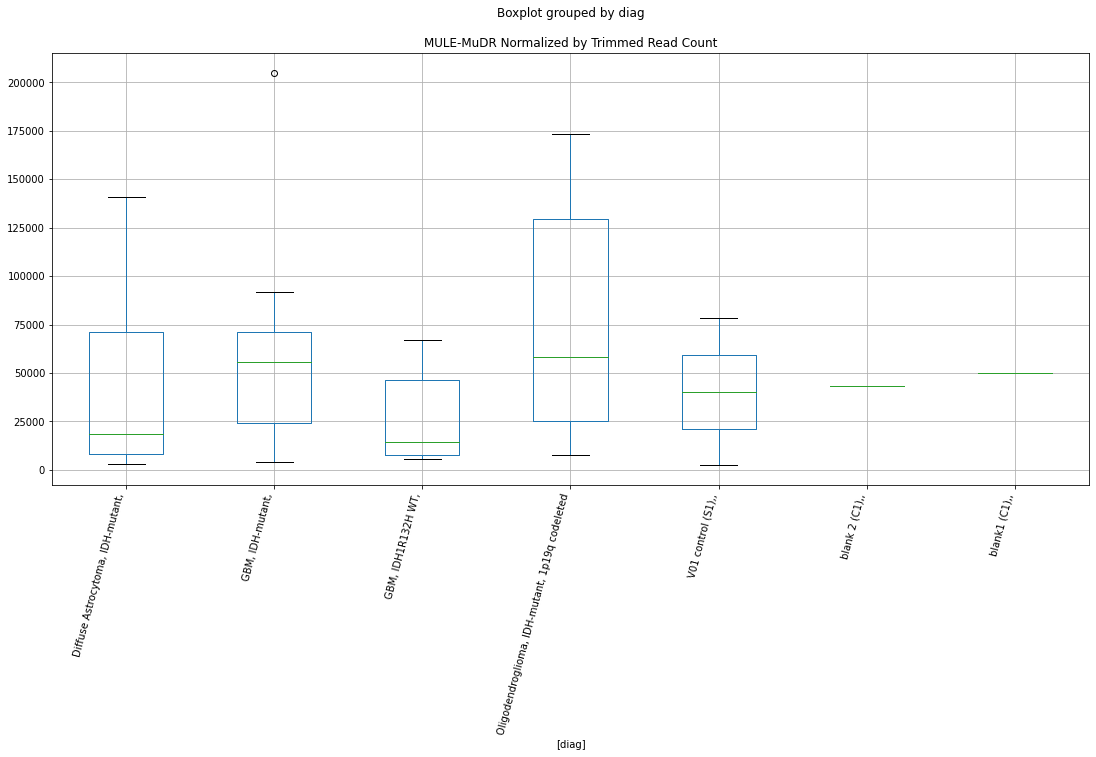

 p : 0.038880964438914645  ( t : 2.2278945506542405 ) :  D-plex  :  cutadapt2  :  tRNA
Control and blanks
76      98489.85
340    156770.32
Name: tRNA, dtype: float64
208    60844.28
Name: tRNA, dtype: float64
472    77446.08
Name: tRNA, dtype: float64


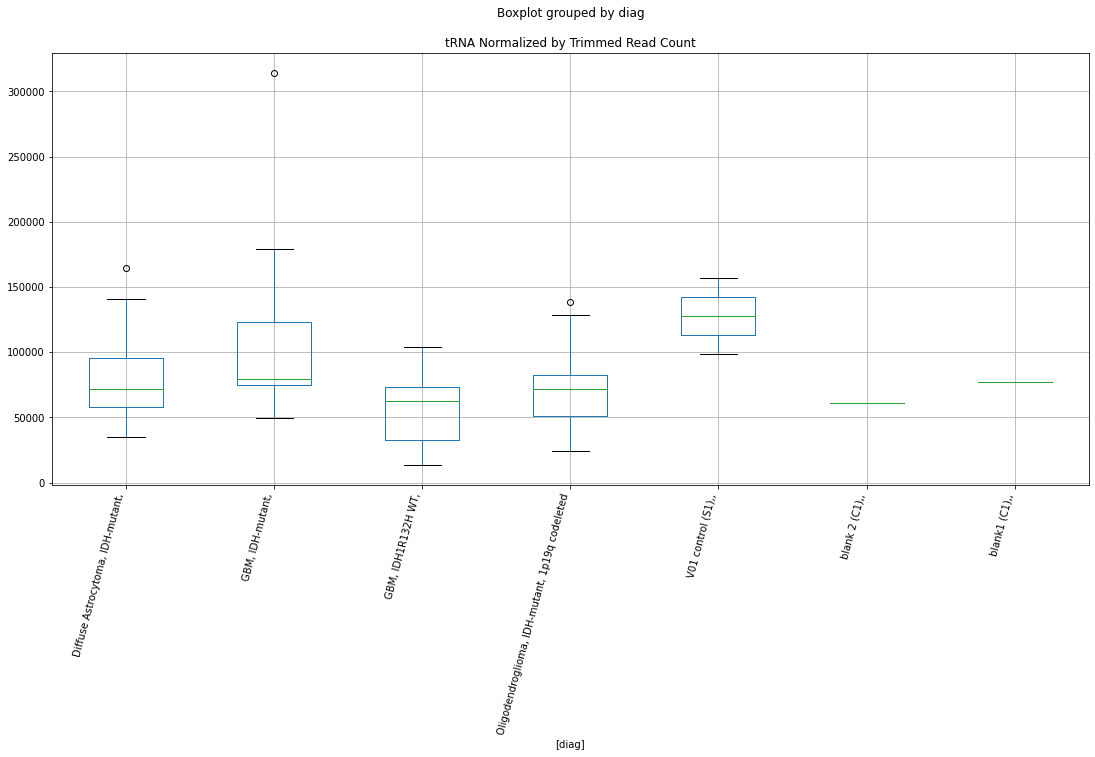

 p : 0.0463630168990746  ( t : 2.1393348378905896 ) :  D-plex  :  bbduk2  :  PiggyBac
Control and blanks
73      4638.05
337    36496.45
Name: PiggyBac, dtype: float64
205    24714.55
Name: PiggyBac, dtype: float64
469    26618.73
Name: PiggyBac, dtype: float64


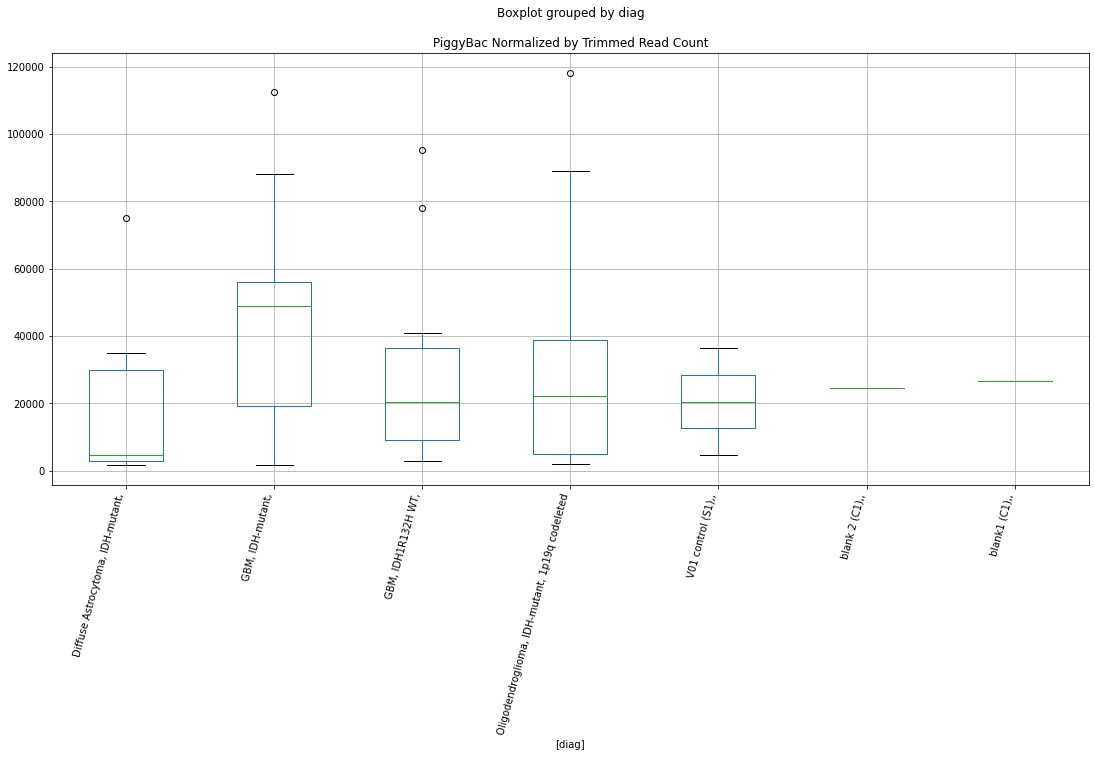

 p : 0.046676900872608416  ( t : 2.1359133474710674 ) :  D-plex  :  bbduk2  :  ERVL?
Control and blanks
73     6957.08
337    2670.47
Name: ERVL?, dtype: float64
205    29012.73
Name: ERVL?, dtype: float64
469    23069.57
Name: ERVL?, dtype: float64


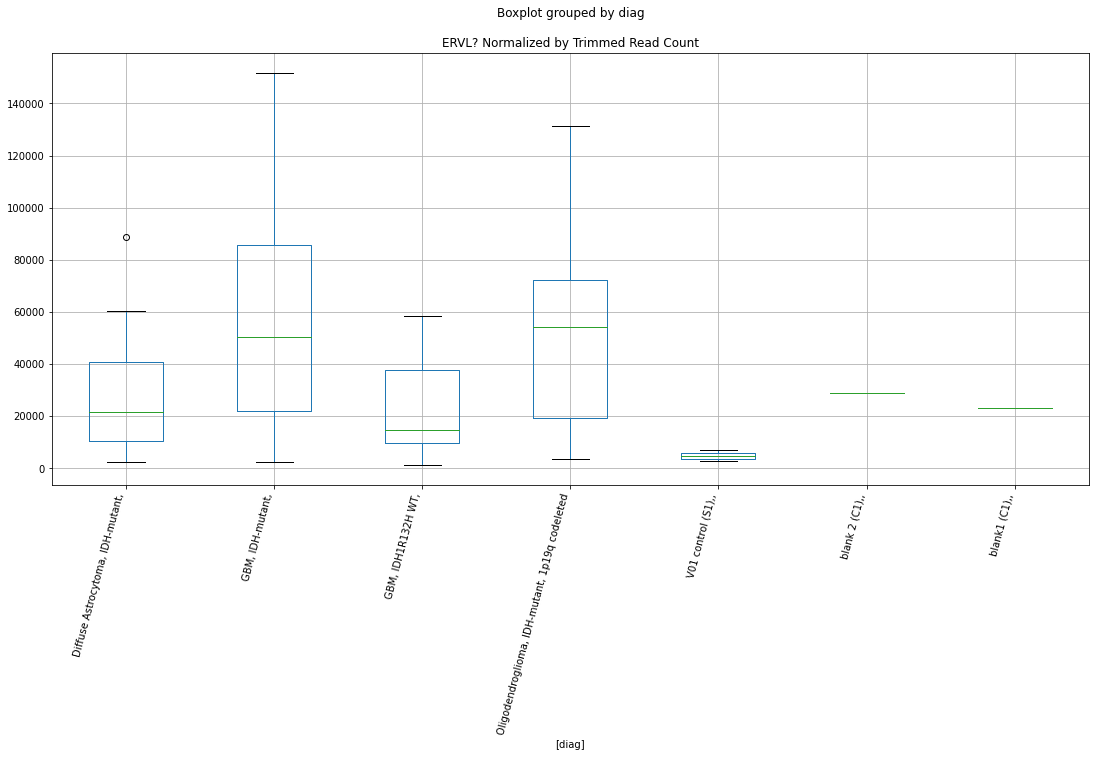

 p : 0.046881441913774934  ( t : 2.1336950284846714 ) :  D-plex  :  bbduk2  :  ERVL?
Control and blanks
73     6957.08
337    2670.47
Name: ERVL?, dtype: float64
205    29012.73
Name: ERVL?, dtype: float64
469    23069.57
Name: ERVL?, dtype: float64


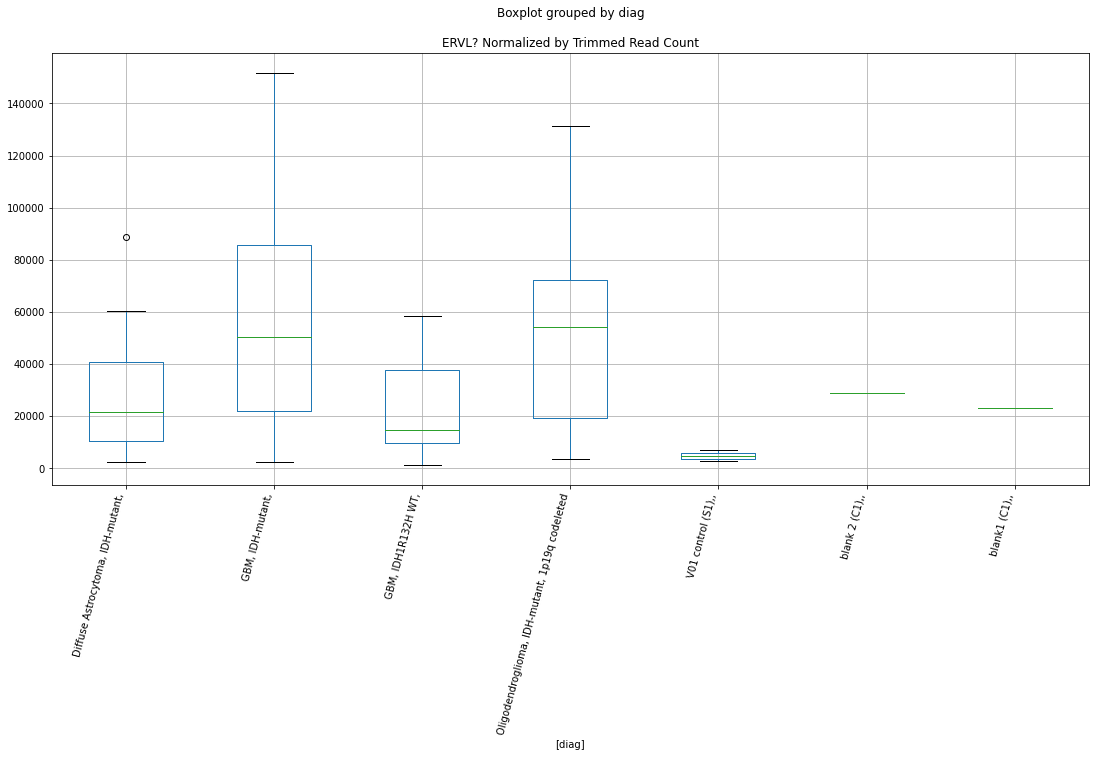

 p : 0.04801608645941608  ( t : 2.121547368142085 ) :  Lexogen  :  bbduk2  :  srpRNA
Control and blanks
79     0.0
343    0.0
Name: srpRNA, dtype: float64
211    0.0
Name: srpRNA, dtype: float64
475    0.0
Name: srpRNA, dtype: float64


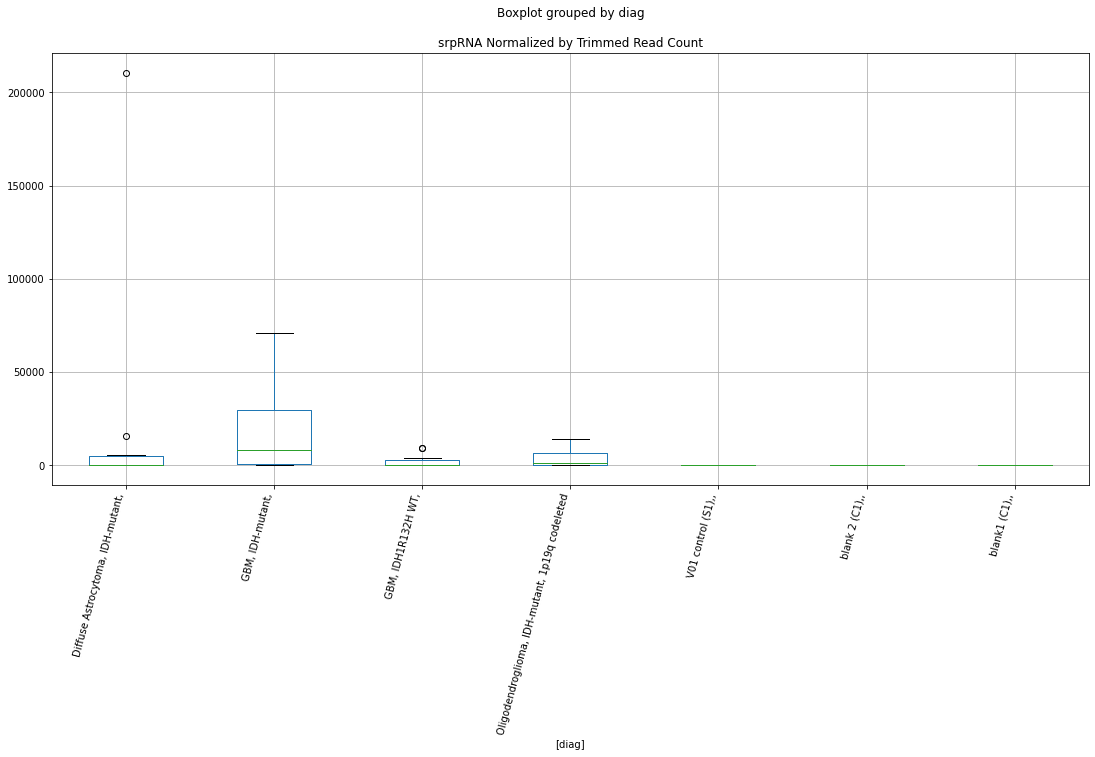

 p : 0.0483298963716309  ( t : 2.118233861073338 ) :  D-plex  :  bbduk2  :  tRNA
Control and blanks
73      96626.05
337    147766.11
Name: tRNA, dtype: float64
205    56771.83
Name: tRNA, dtype: float64
469    69208.7
Name: tRNA, dtype: float64


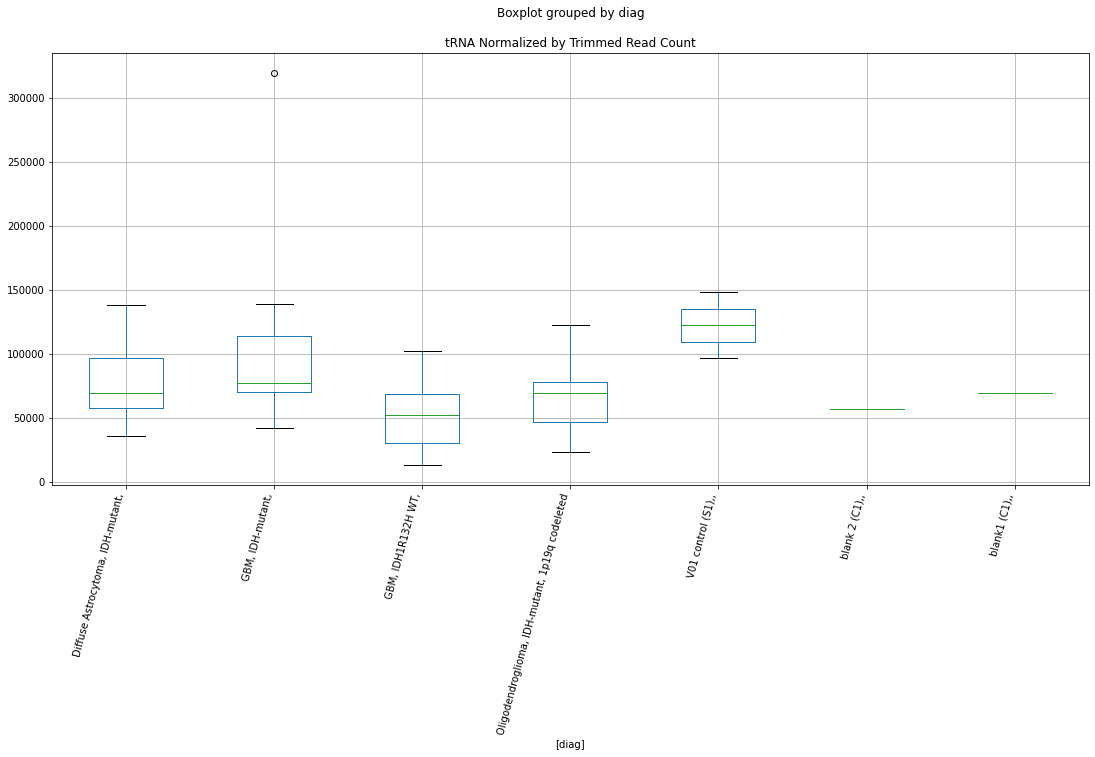

 p : 0.04886128982089244  ( t : 2.112667314572936 ) :  D-plex  :  bbduk2  :  tRNA-Deu
Control and blanks
73     2319.03
337       0.00
Name: tRNA-Deu, dtype: float64
205    4119.09
Name: tRNA-Deu, dtype: float64
469    2957.64
Name: tRNA-Deu, dtype: float64


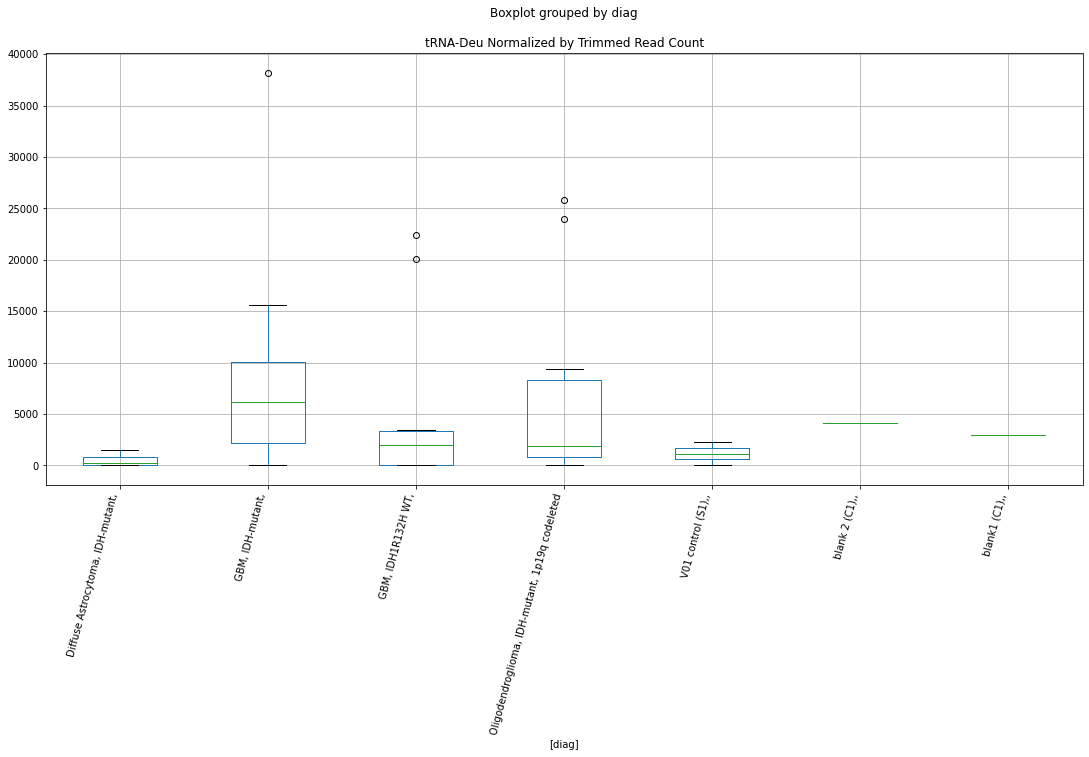

 p : 0.04980226750536102  ( t : 2.102943990687065 ) :  Lexogen  :  cutadapt2  :  srpRNA
Control and blanks
82     0.0
346    0.0
Name: srpRNA, dtype: float64
214    0.0
Name: srpRNA, dtype: float64
478    0.0
Name: srpRNA, dtype: float64


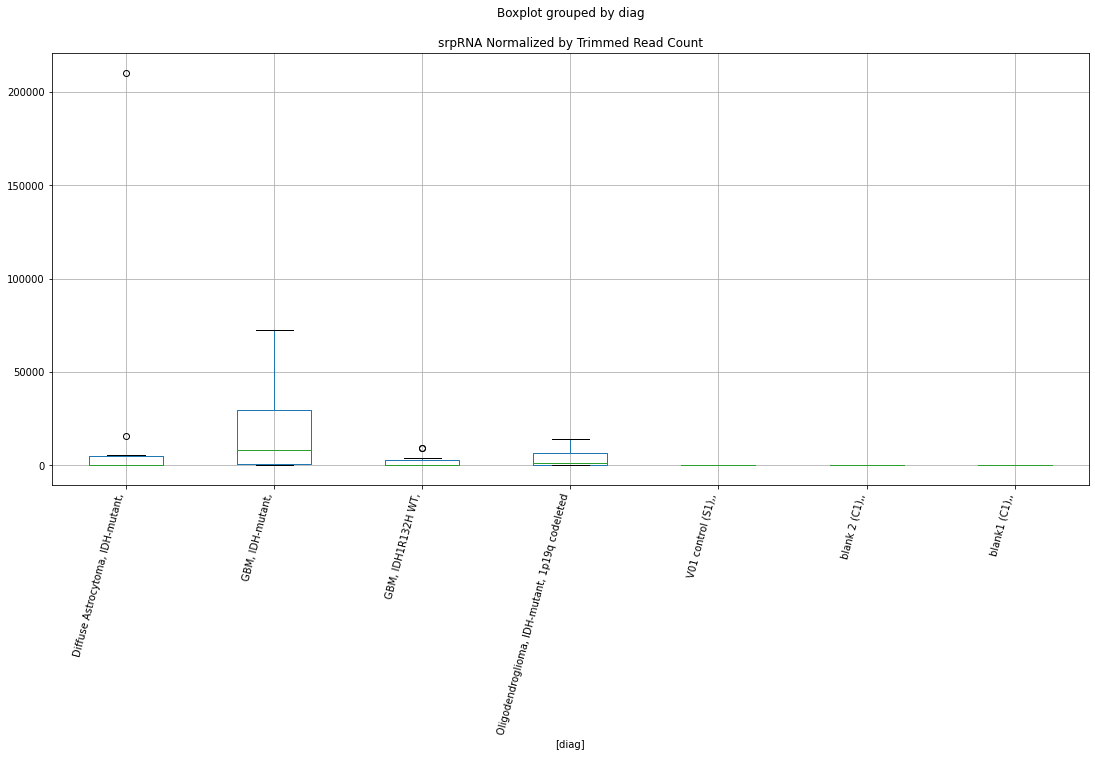

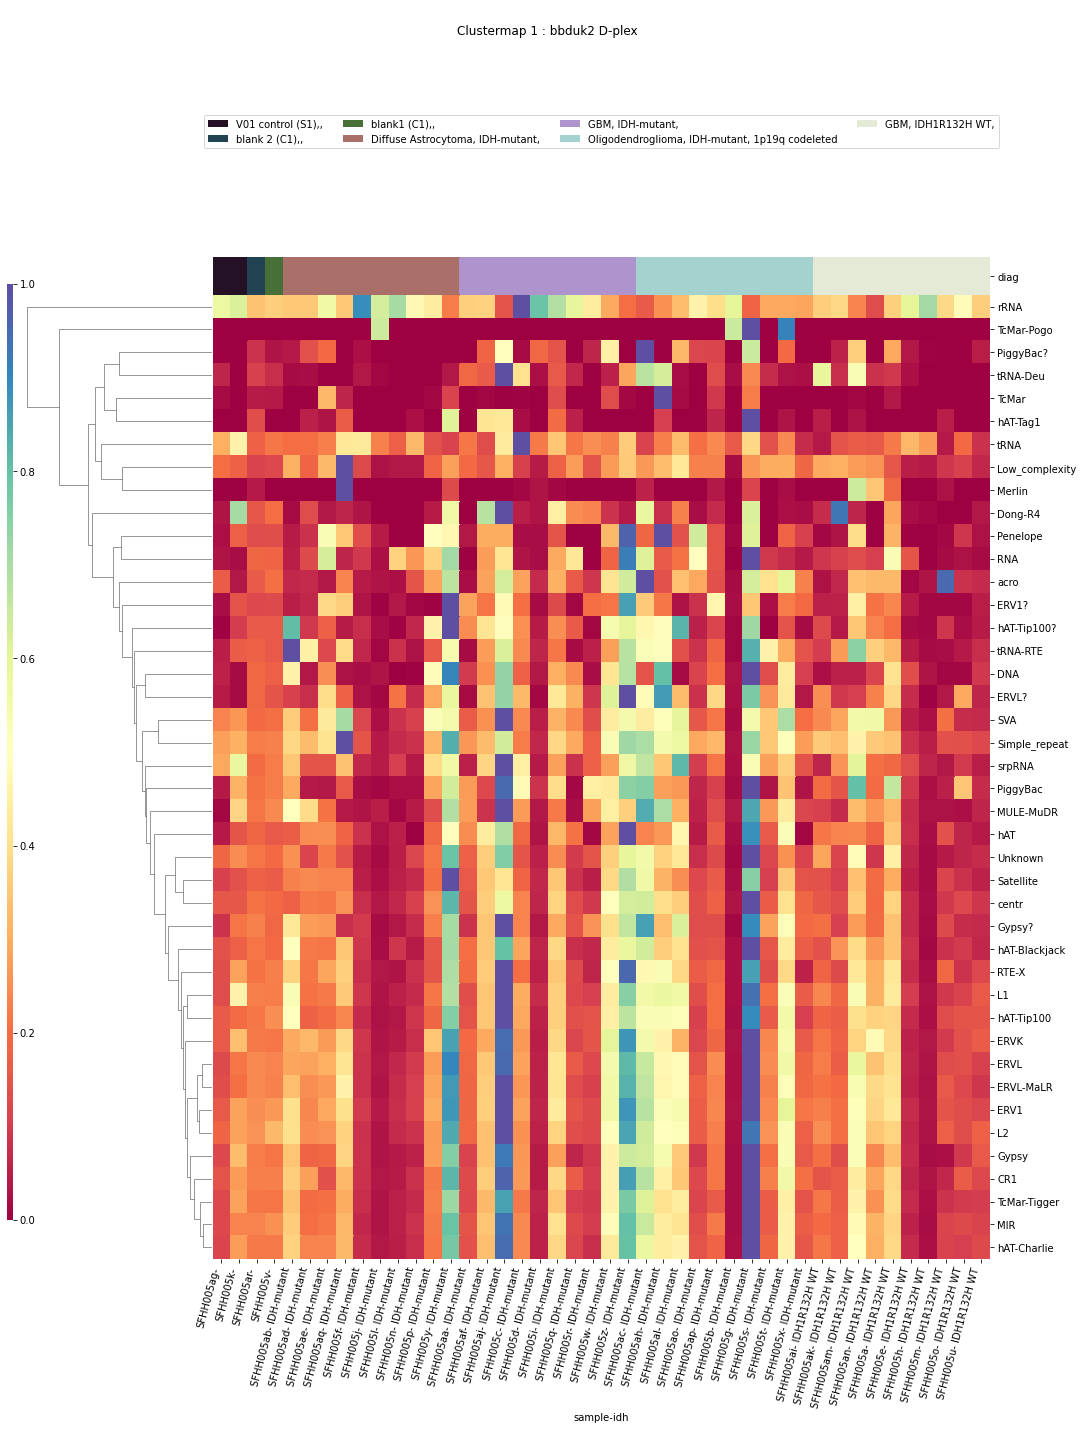

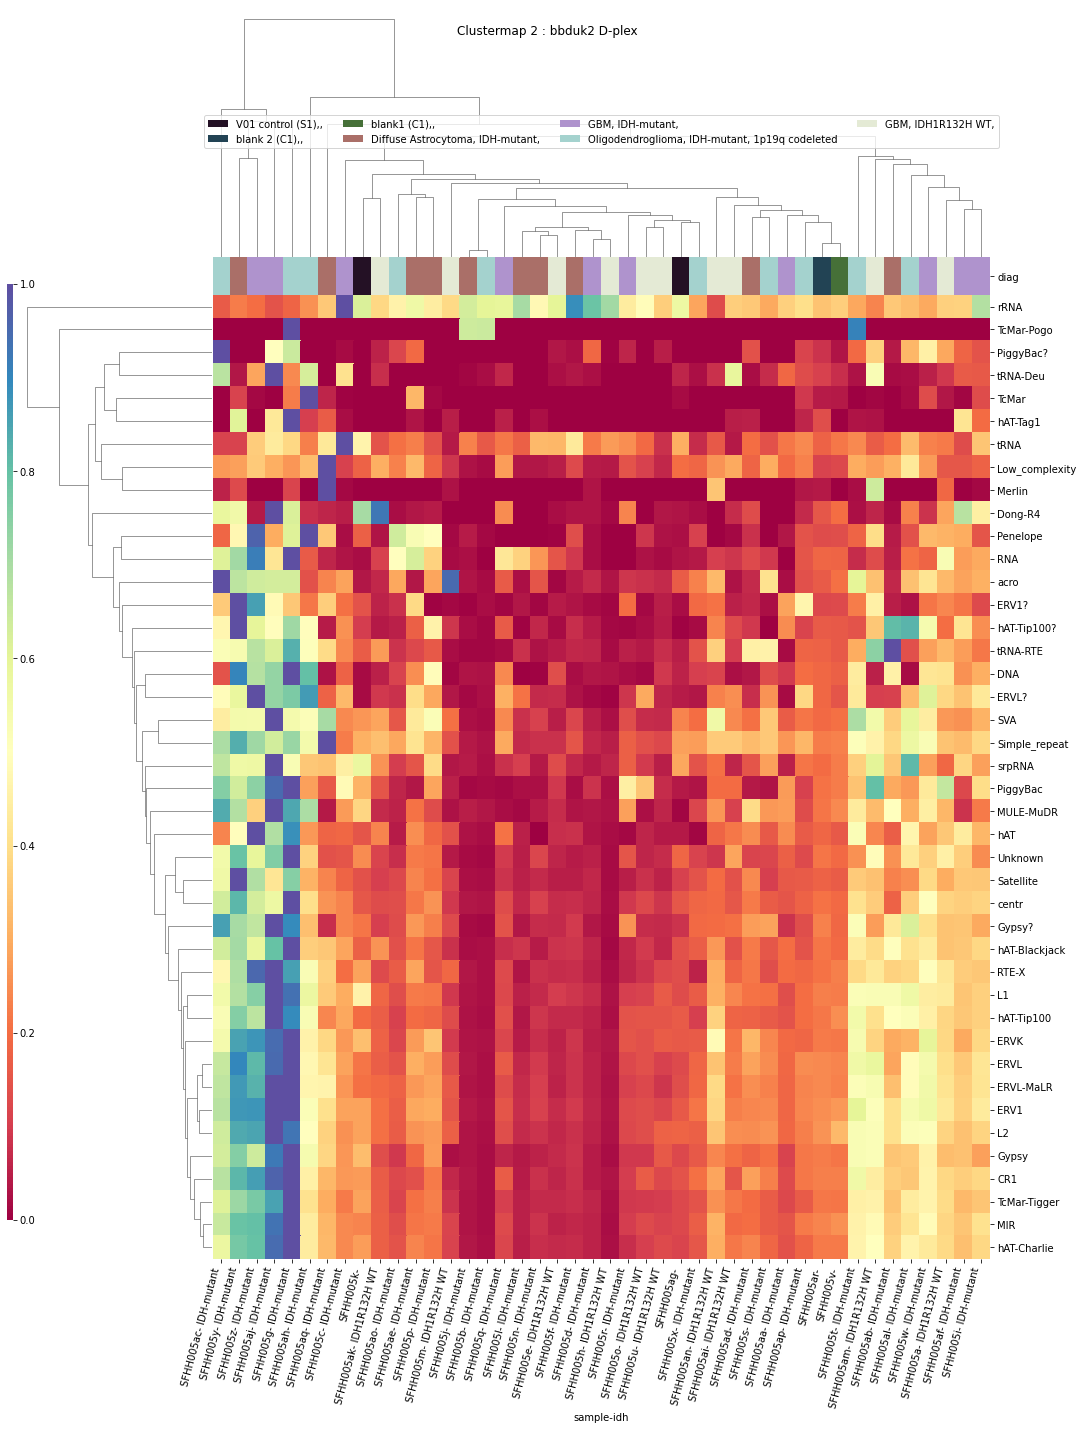

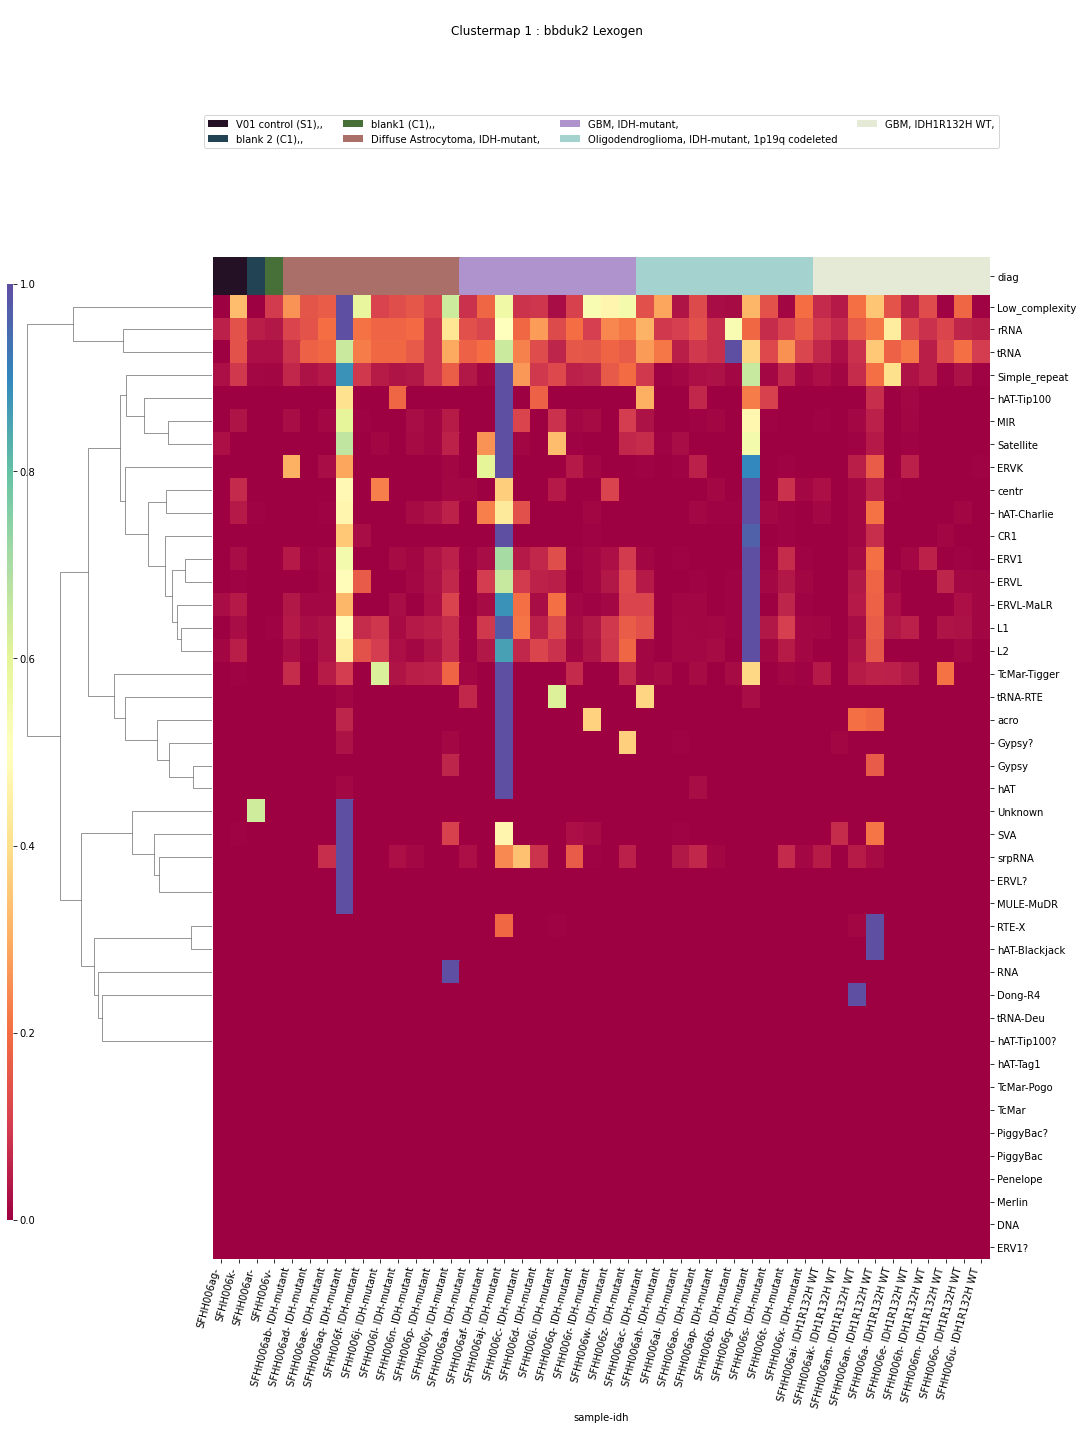

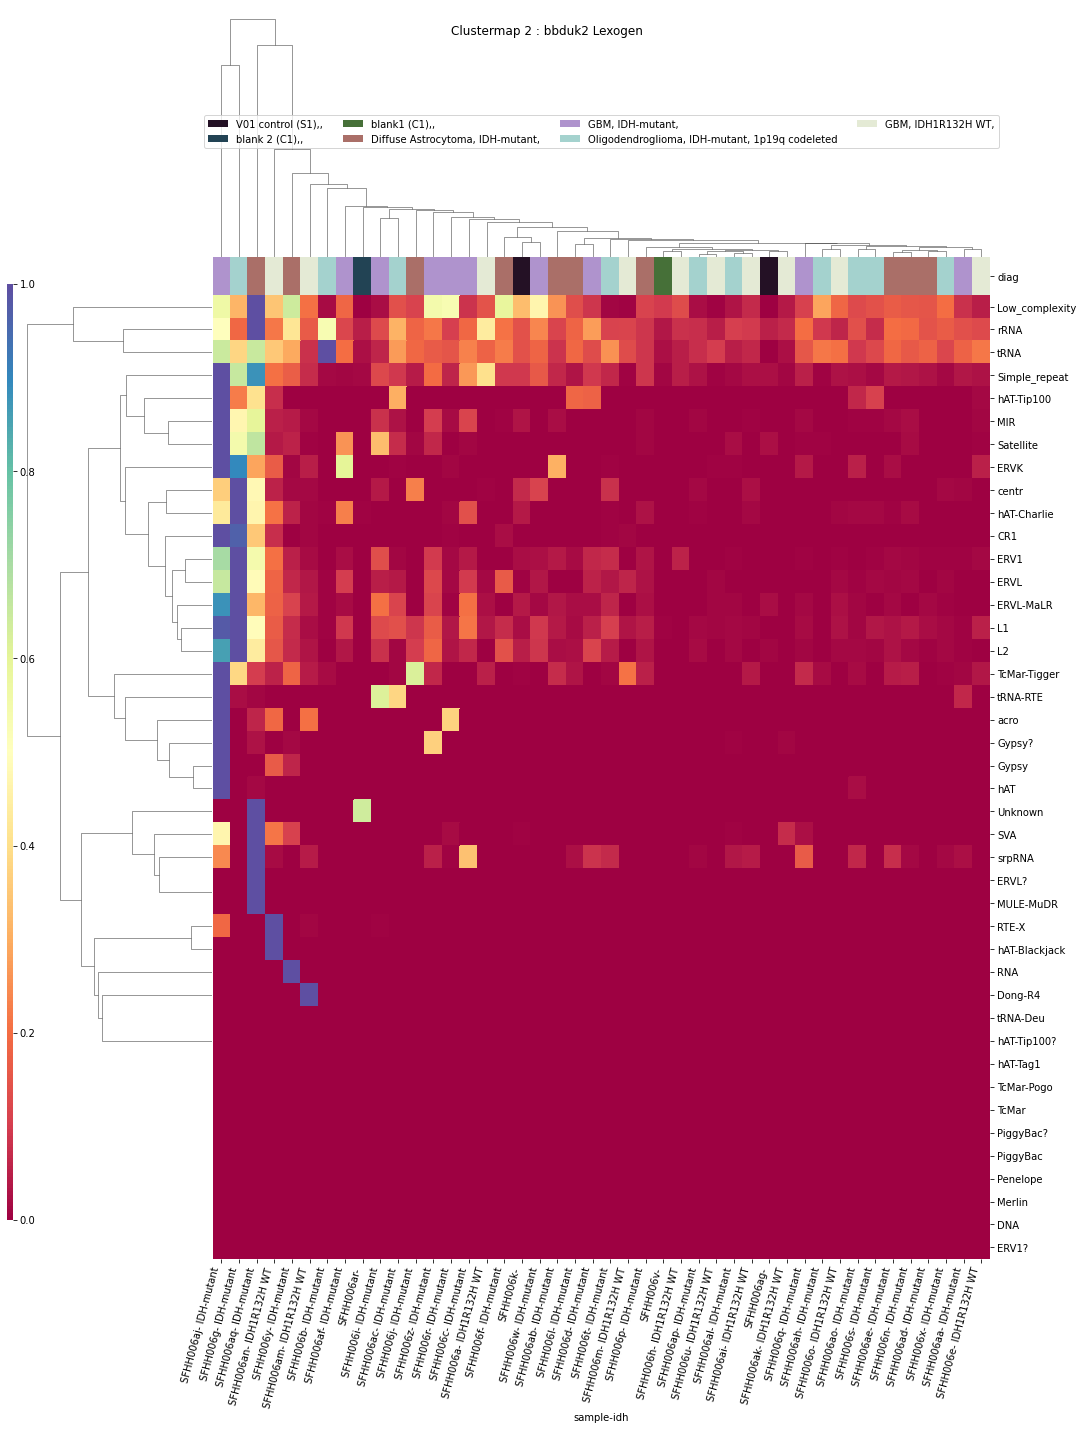

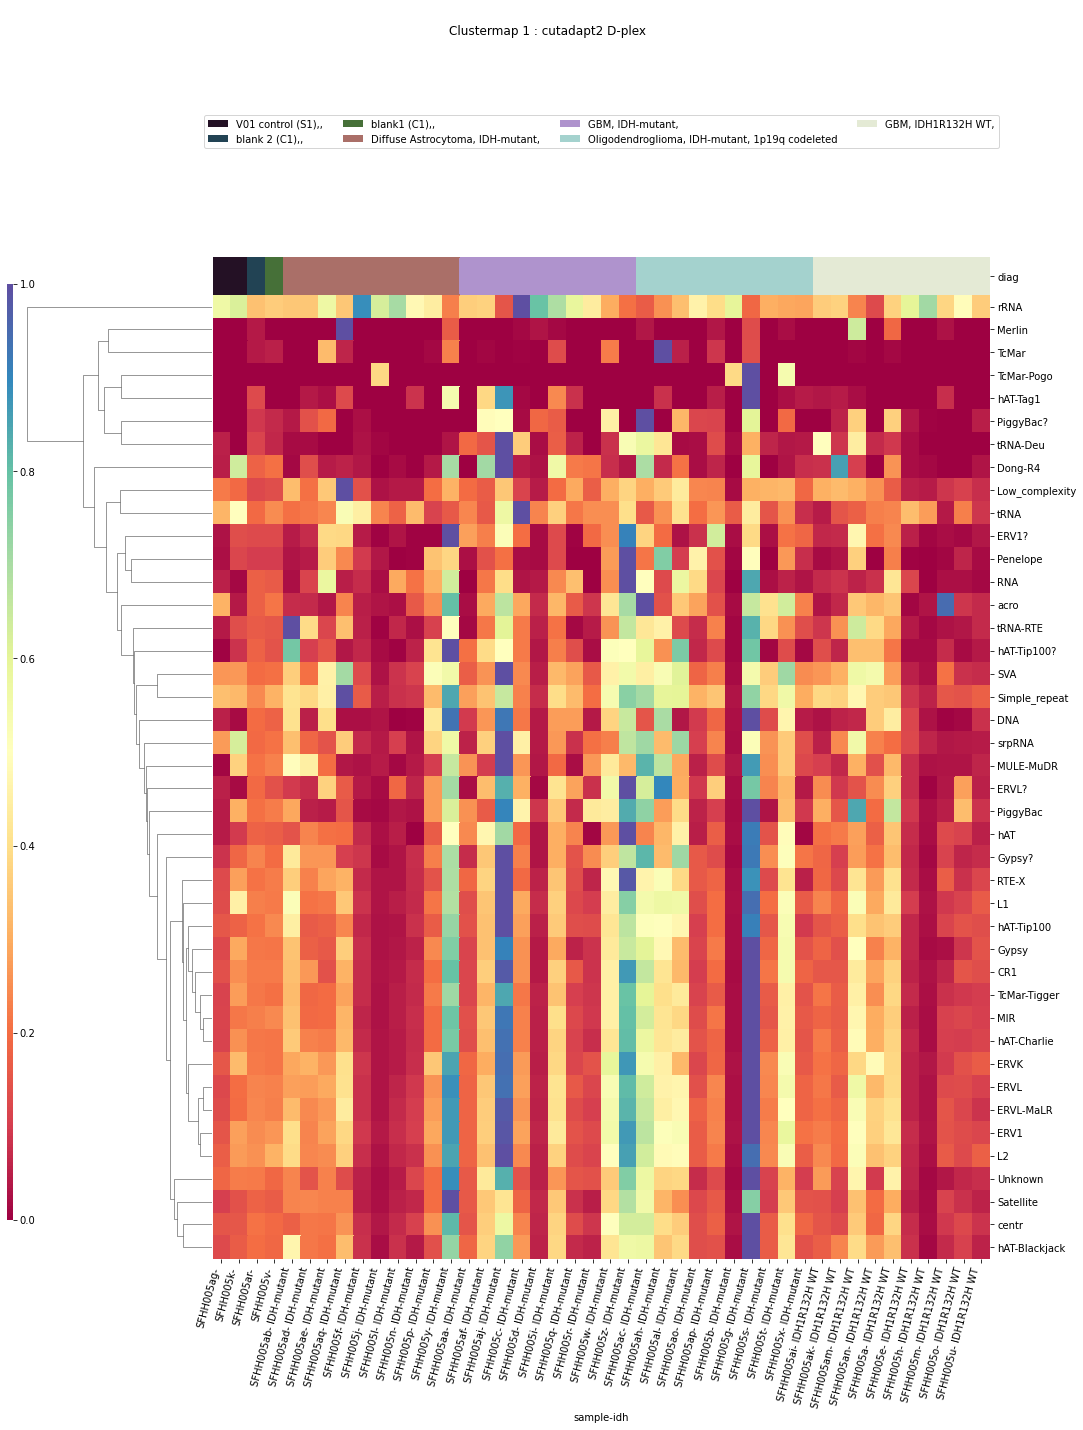

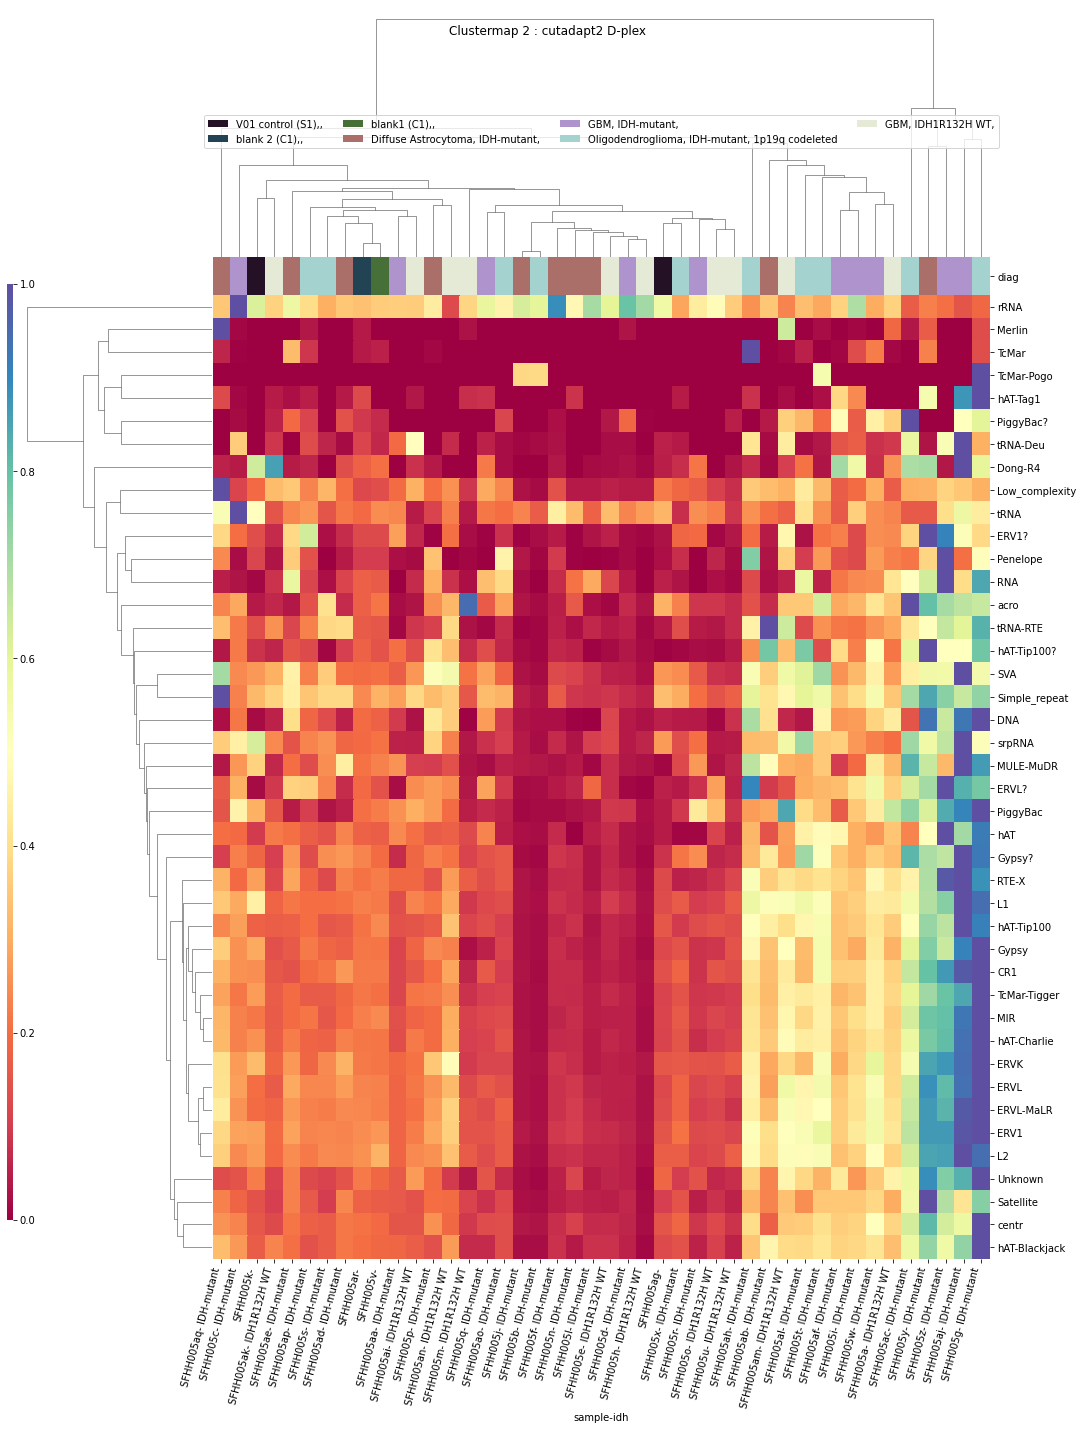

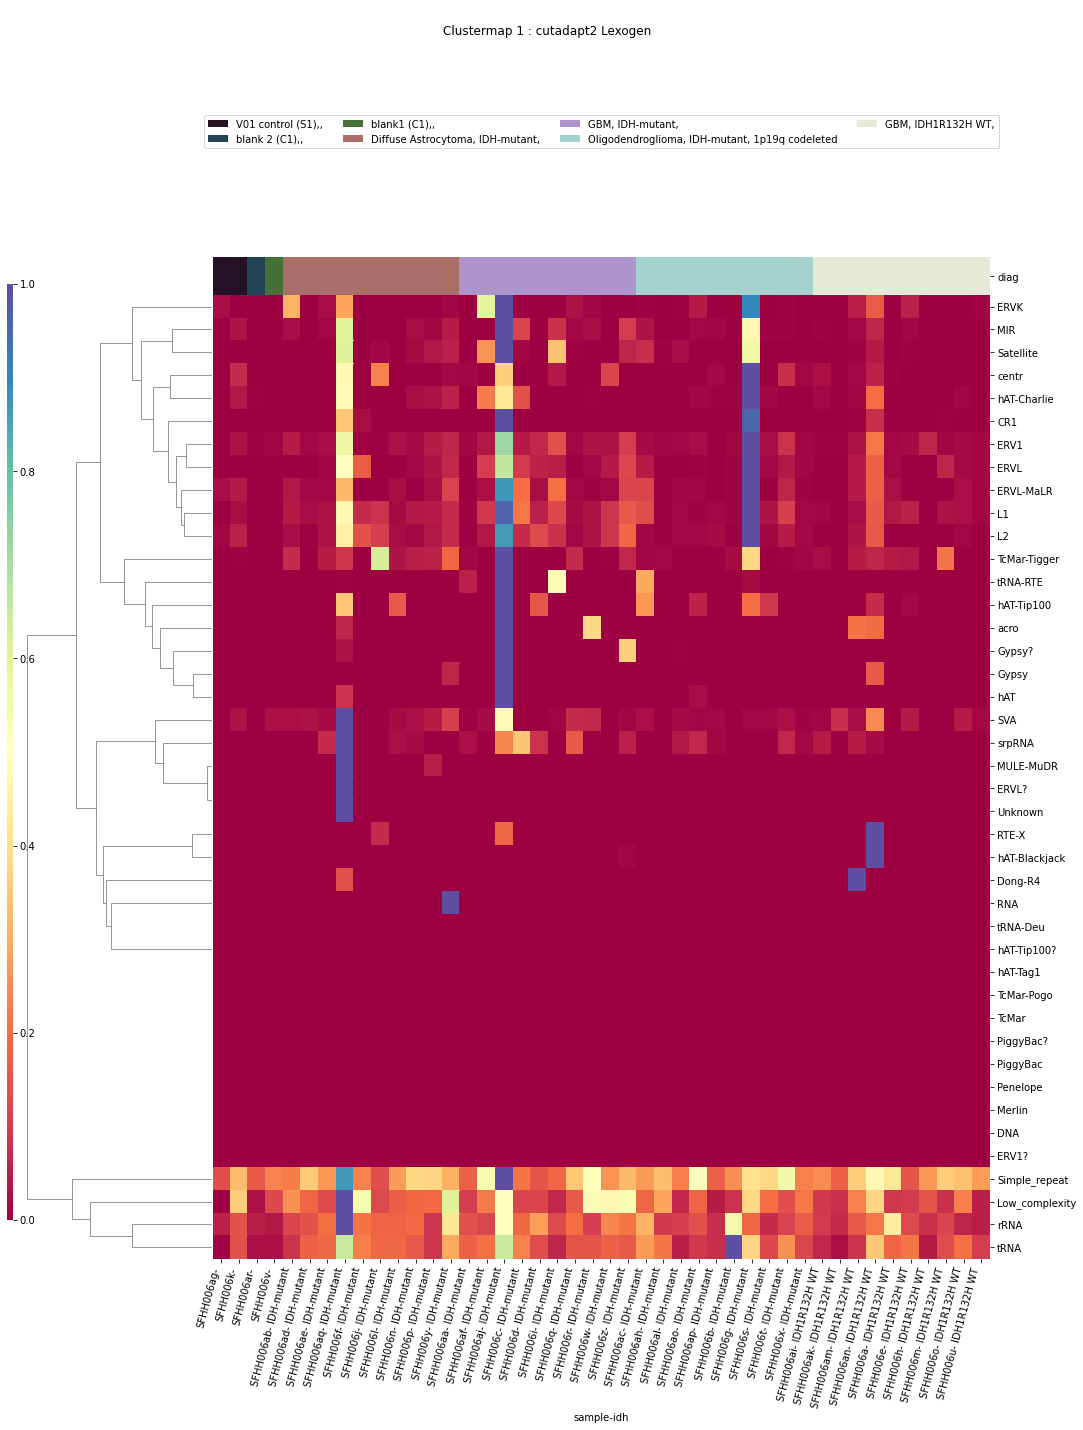

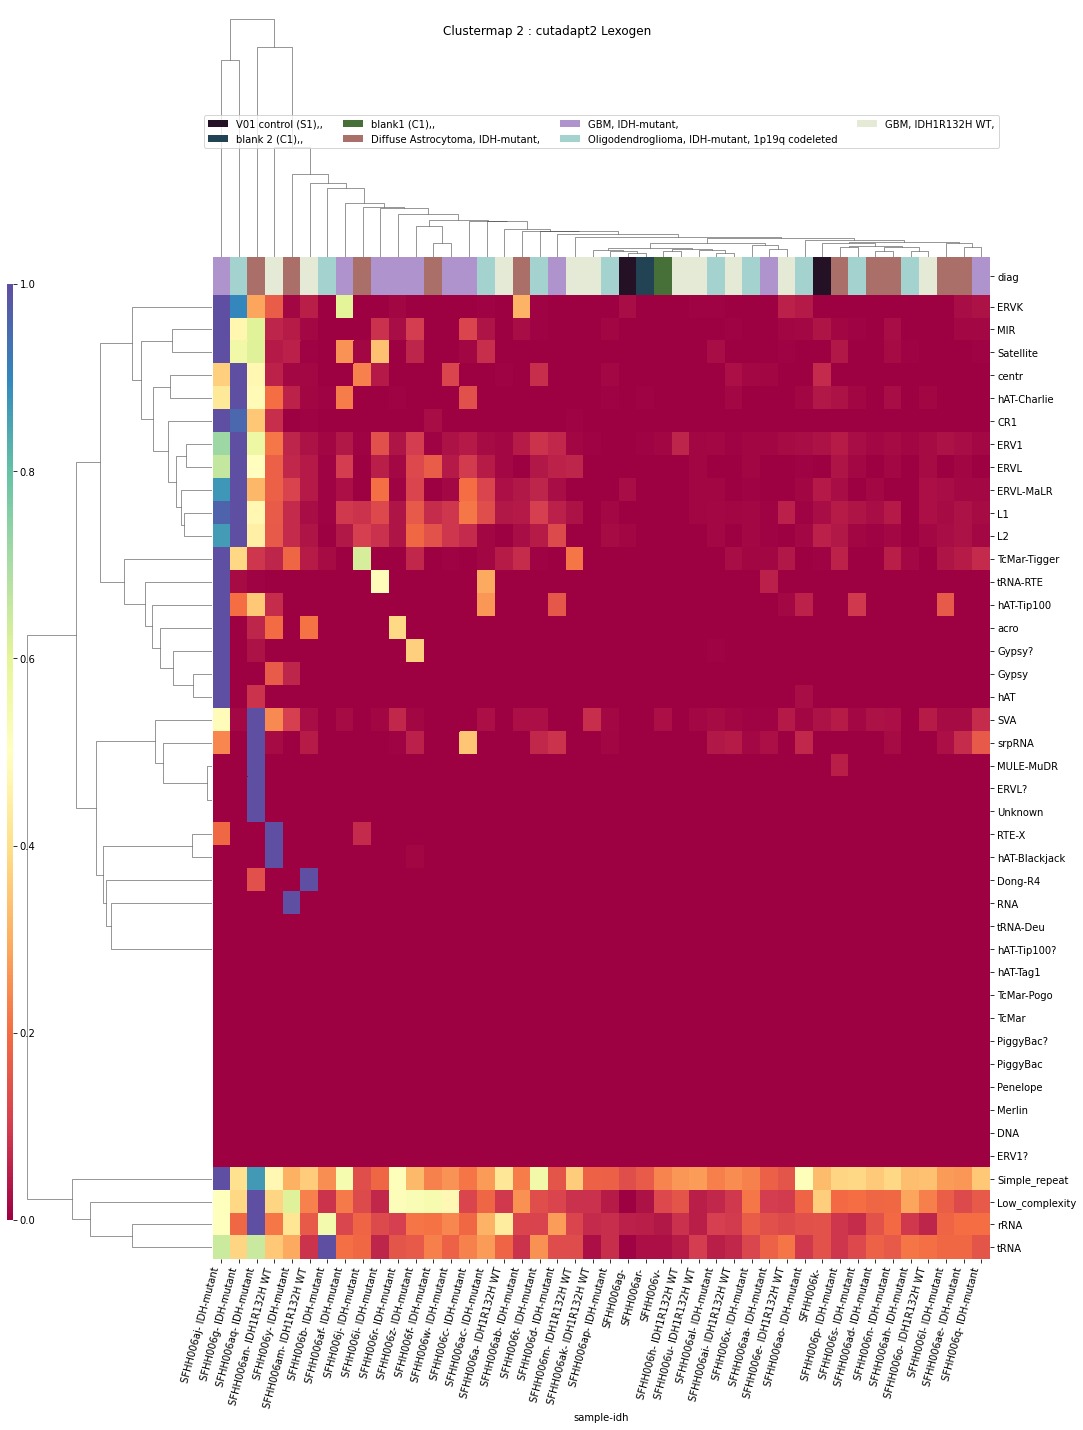

In [64]:
ttests_boxplots_and_heatmaps(dfn,elements)

In [65]:
datetime.now().strftime("%H:%M:%S")

'10:54:10'

# PCA

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#alldiags=dfn['diag'].unique().tolist()

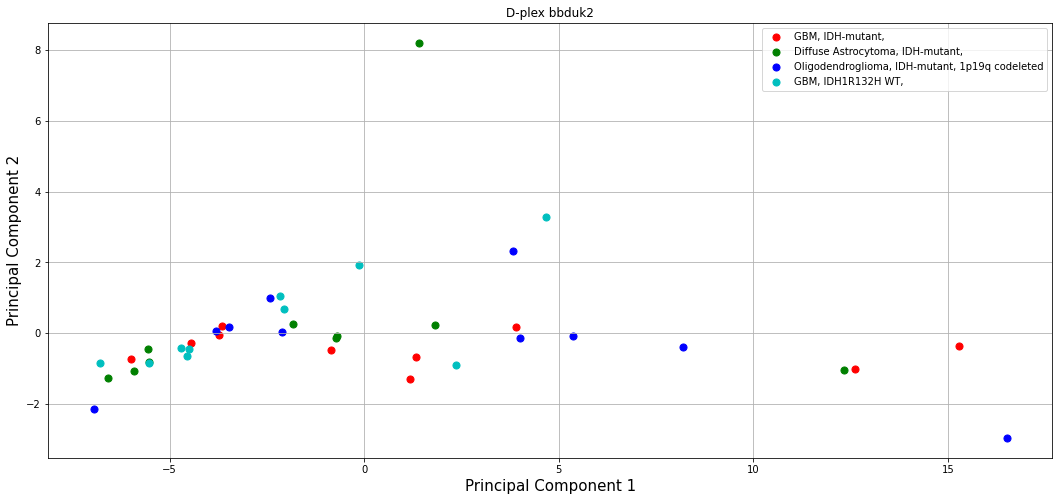

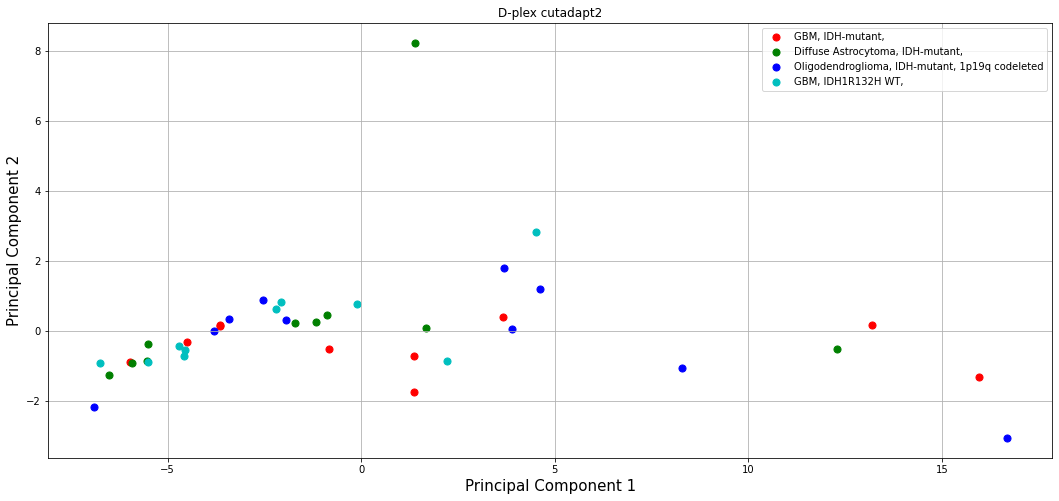

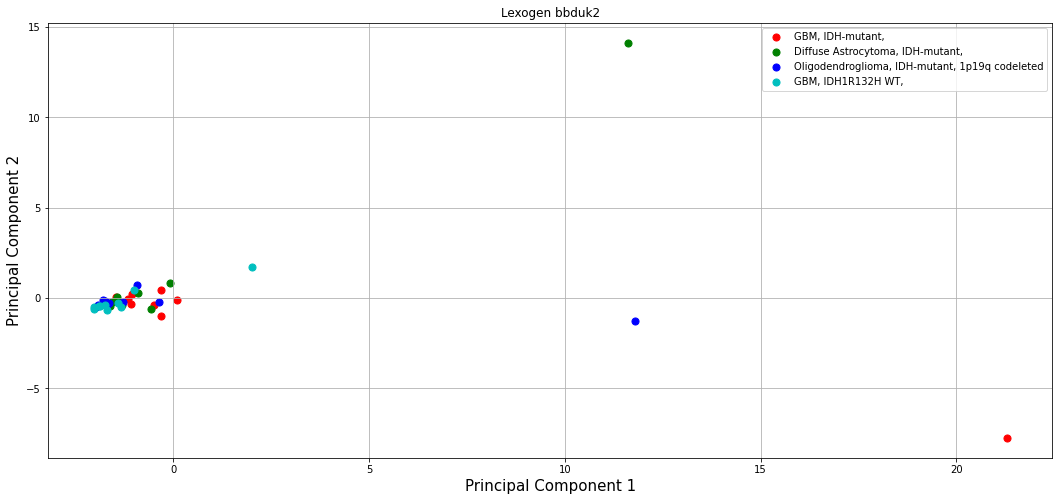

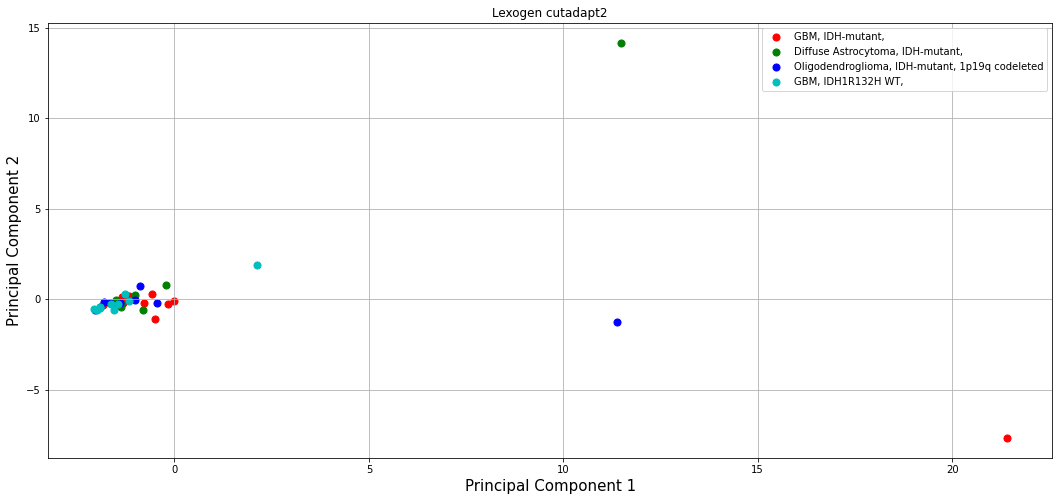

In [67]:
for labkit in dfn['Lab kit'].unique():
    #"D-plex","Lexogen":
    for trimmer in 'bbduk2','cutadapt2':
        #localdf['Trimmer'].unique():
        #pcadf=dfn[(dfn["Lab kit"]==labkit) & (dfn["trimmer"]==trimmer).copy()
        pcadf=dfn[(dfn["Lab kit"]==labkit) & (dfn["trimmer"]==trimmer) & dfn['diag'].isin(diags)].copy()

        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        pca = PCA(n_components=2)
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        #pcadf['diag_index']=pcadf['diag'].apply(lambda x: alldiags.index(x))
        pcadf['diag_index']=pcadf['diag'].apply(lambda x: diags.index(x))
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
        #targets = alldiags
        targets = diags
        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(targets,colors):
            indicesToKeep = pcadf['diag'] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(targets)
        ax.grid()
        plt.title(labkit + " " + trimmer)
        plt.show()
        

In [68]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [69]:
pd.set_option('display.max_columns', default_max_columns)

In [70]:
pd.set_option('display.max_rows',default_max_rows)

In [71]:
pd.set_option('display.precision', default_precision)